<a href="https://colab.research.google.com/github/vietxb0911/yolov5/blob/main/Yolo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. CUSTOM DATA

In [1]:
!curl -L "https://public.roboflow.com/ds/2H4Ty9bY3h?key=EGSpgnTVQ0" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   888  100   888    0     0   1248      0 --:--:-- --:--:-- --:--:--  1248
100  215M  100  215M    0     0  67.4M      0  0:00:03  0:00:03 --:--:-- 94.5M
Archive:  roboflow.zip
 extracting: README.dataset.txt      
 extracting: README.roboflow.txt     
 extracting: data.yaml               
   creating: test/
   creating: test/images/
 extracting: test/images/addons_mozilla_org_png.rf.8pWFwr9ZblJ92BQghXBW.jpg  
 extracting: test/images/addons_mozilla_org_png.rf.ec9a8e78cd5c0e6ab255f50c408caecf.jpg  
 extracting: test/images/adf_ly_png.rf.490b629d732bbf70e8e1d3720f440c06.jpg  
 extracting: test/images/adf_ly_png.rf.wAqxeIIVZNBMd0Ljcsmr.jpg  
 extracting: test/images/advancedcustomfields_com_png.rf.c4798c56992e8b9b953bdcc479c3fb39.jpg  
 extracting: test/images/advancedcustomfields_com_png.rf.z0apExwDBHkpfuqG8tNi.jpg  
 extractin

# 2. SETUP

In [2]:
!git clone https://github.com/ultralytics/yolov5  # clone repo
%cd yolov5
%pip install -qr requirements.txt  # install dependencies

import torch
from IPython.display import Image, clear_output  # to display images

clear_output()
print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Setup complete. Using torch 1.9.0+cu102 (Tesla T4)


# 3. DETECT

detect: weights=['yolov5s.pt'], source=data/images/, imgsz=640, conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False
YOLOv5 🚀 v5.0-259-g831773f torch 1.9.0+cu102 CUDA:0 (Tesla T4, 15109.75MB)

100% 14.1M/14.1M [00:00<00:00, 63.3MB/s]

Fusing layers... 
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
Model Summary: 224 layers, 7266973 parameters, 0 gradients
image 1/3 /content/yolov5/

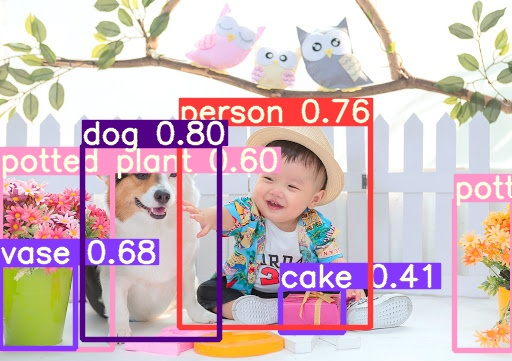

In [3]:
!python detect.py --weights yolov5s.pt --img 640 --conf 0.25 --source data/images/
Image(filename='runs/detect/exp/image.jpg', width=600)

# 4. TRAIN

In [4]:
!python train.py --img 640 --batch 64 --epochs 100 --data data.yaml --weights yolov5s.pt --cache

train: weights=yolov5s.pt, cfg=, data=data.yaml, hyp=data/hyps/hyp.scratch.yaml, epochs=100, batch_size=64, img_size=[640], rect=False, resume=False, nosave=False, notest=False, noautoanchor=False, evolve=False, bucket=, cache_images=True, image_weights=False, device=, multi_scale=False, single_cls=False, adam=False, sync_bn=False, workers=8, project=runs/train, entity=None, name=exp, exist_ok=False, quad=False, linear_lr=False, label_smoothing=0.0, upload_dataset=False, bbox_interval=-1, save_period=-1, artifact_alias=latest, local_rank=-1
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v5.0-259-g831773f torch 1.9.0+cu102 CUDA:0 (Tesla T4, 15109.75MB)

hyperparameters: lr0=0.01, lrf=0.2, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, degrees=0.0, translate=0.1, scale=0.5, shear=0.0, pers

# 5. TEST

In [27]:
!python test.py --weights last.pt --data data.yaml --img 640 --iou 0.65 --half --task test

test: data=./data/data.yaml, weights=['last.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.65, task=test, device=, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/test, name=exp, exist_ok=False, half=True
YOLOv5 🚀 v5.0-259-g831773f torch 1.9.0+cu102 CUDA:0 (Tesla T4, 15109.75MB)

Fusing layers... 
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
Model Summary: 224 layers, 7072789 parameters, 0 gradients, 16.4 GFLOPs
test: Scanning '../test/labels' images and labels...242 found, 0 missing, 0 empty, 36 corrupted: 100% 242/242 [00:00<00:00, 701.

# 6. VISUALIZE TESTING

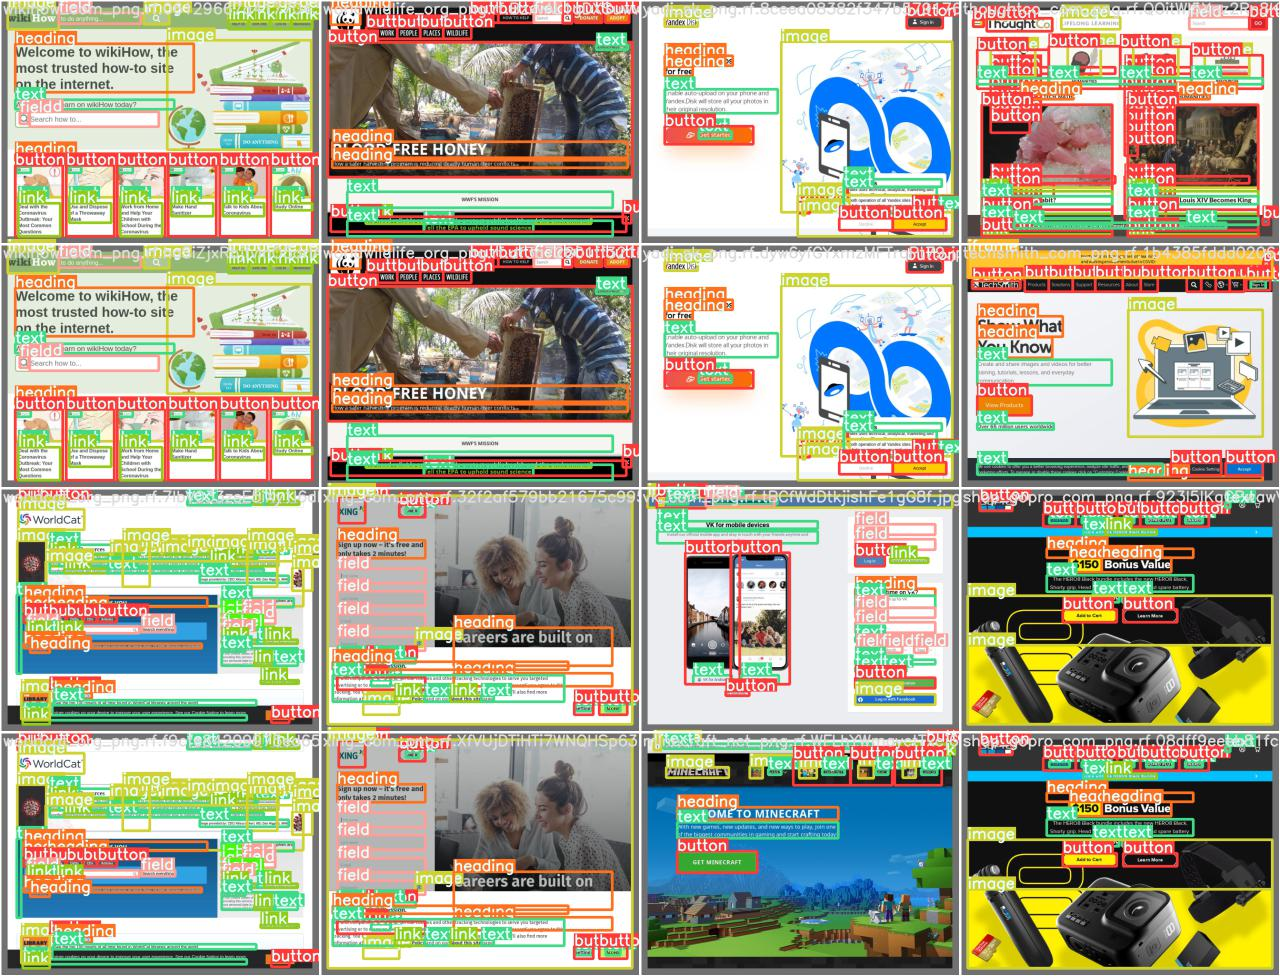

In [34]:
Image(filename='runs/test/exp2/test_batch2_labels.jpg', width=800)  # test batch 0 labels

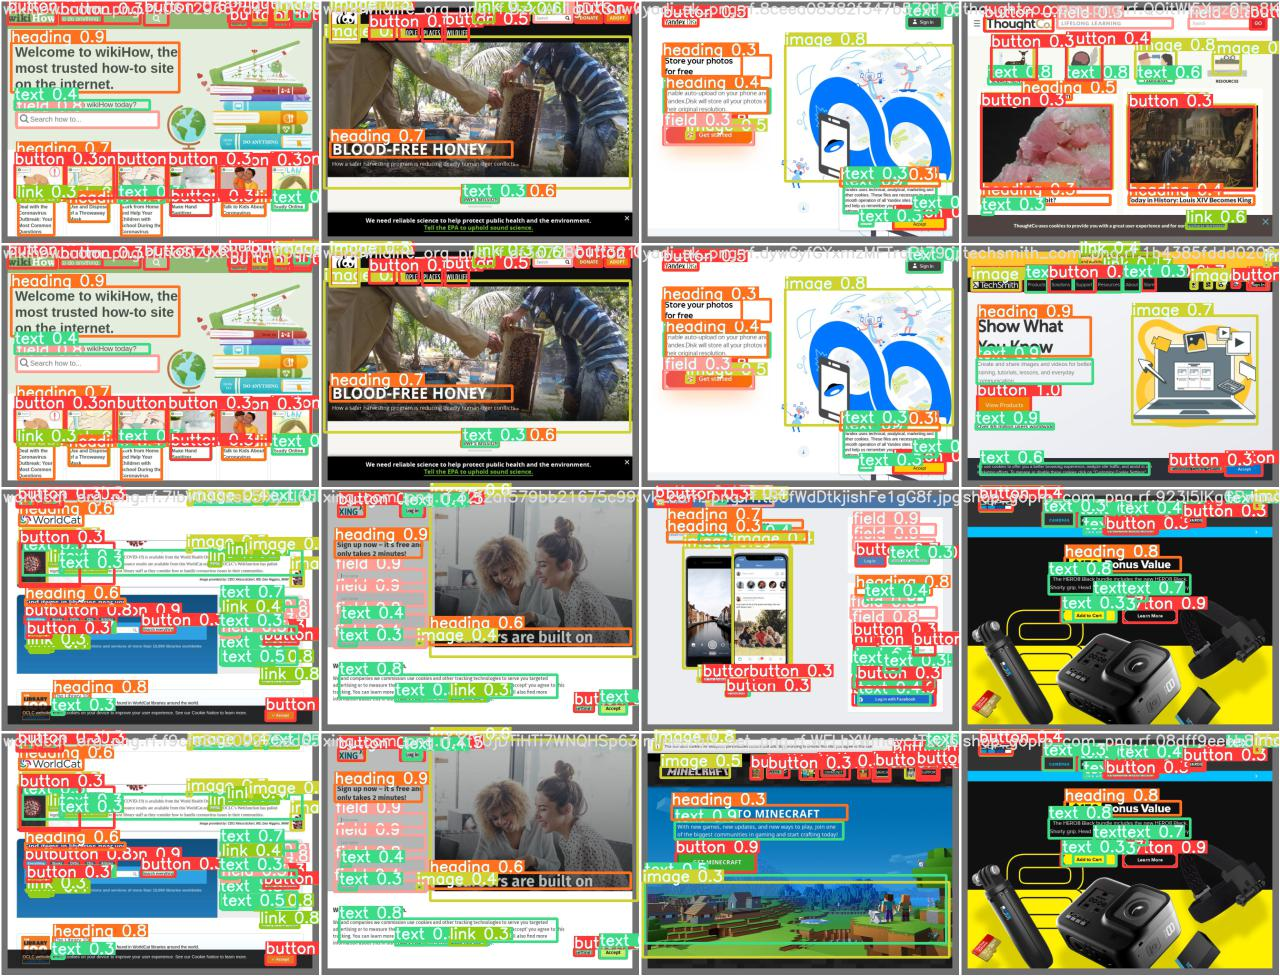

In [35]:
Image(filename='runs/test/exp2/test_batch2_pred.jpg', width=800)  # test batch 0 predictions

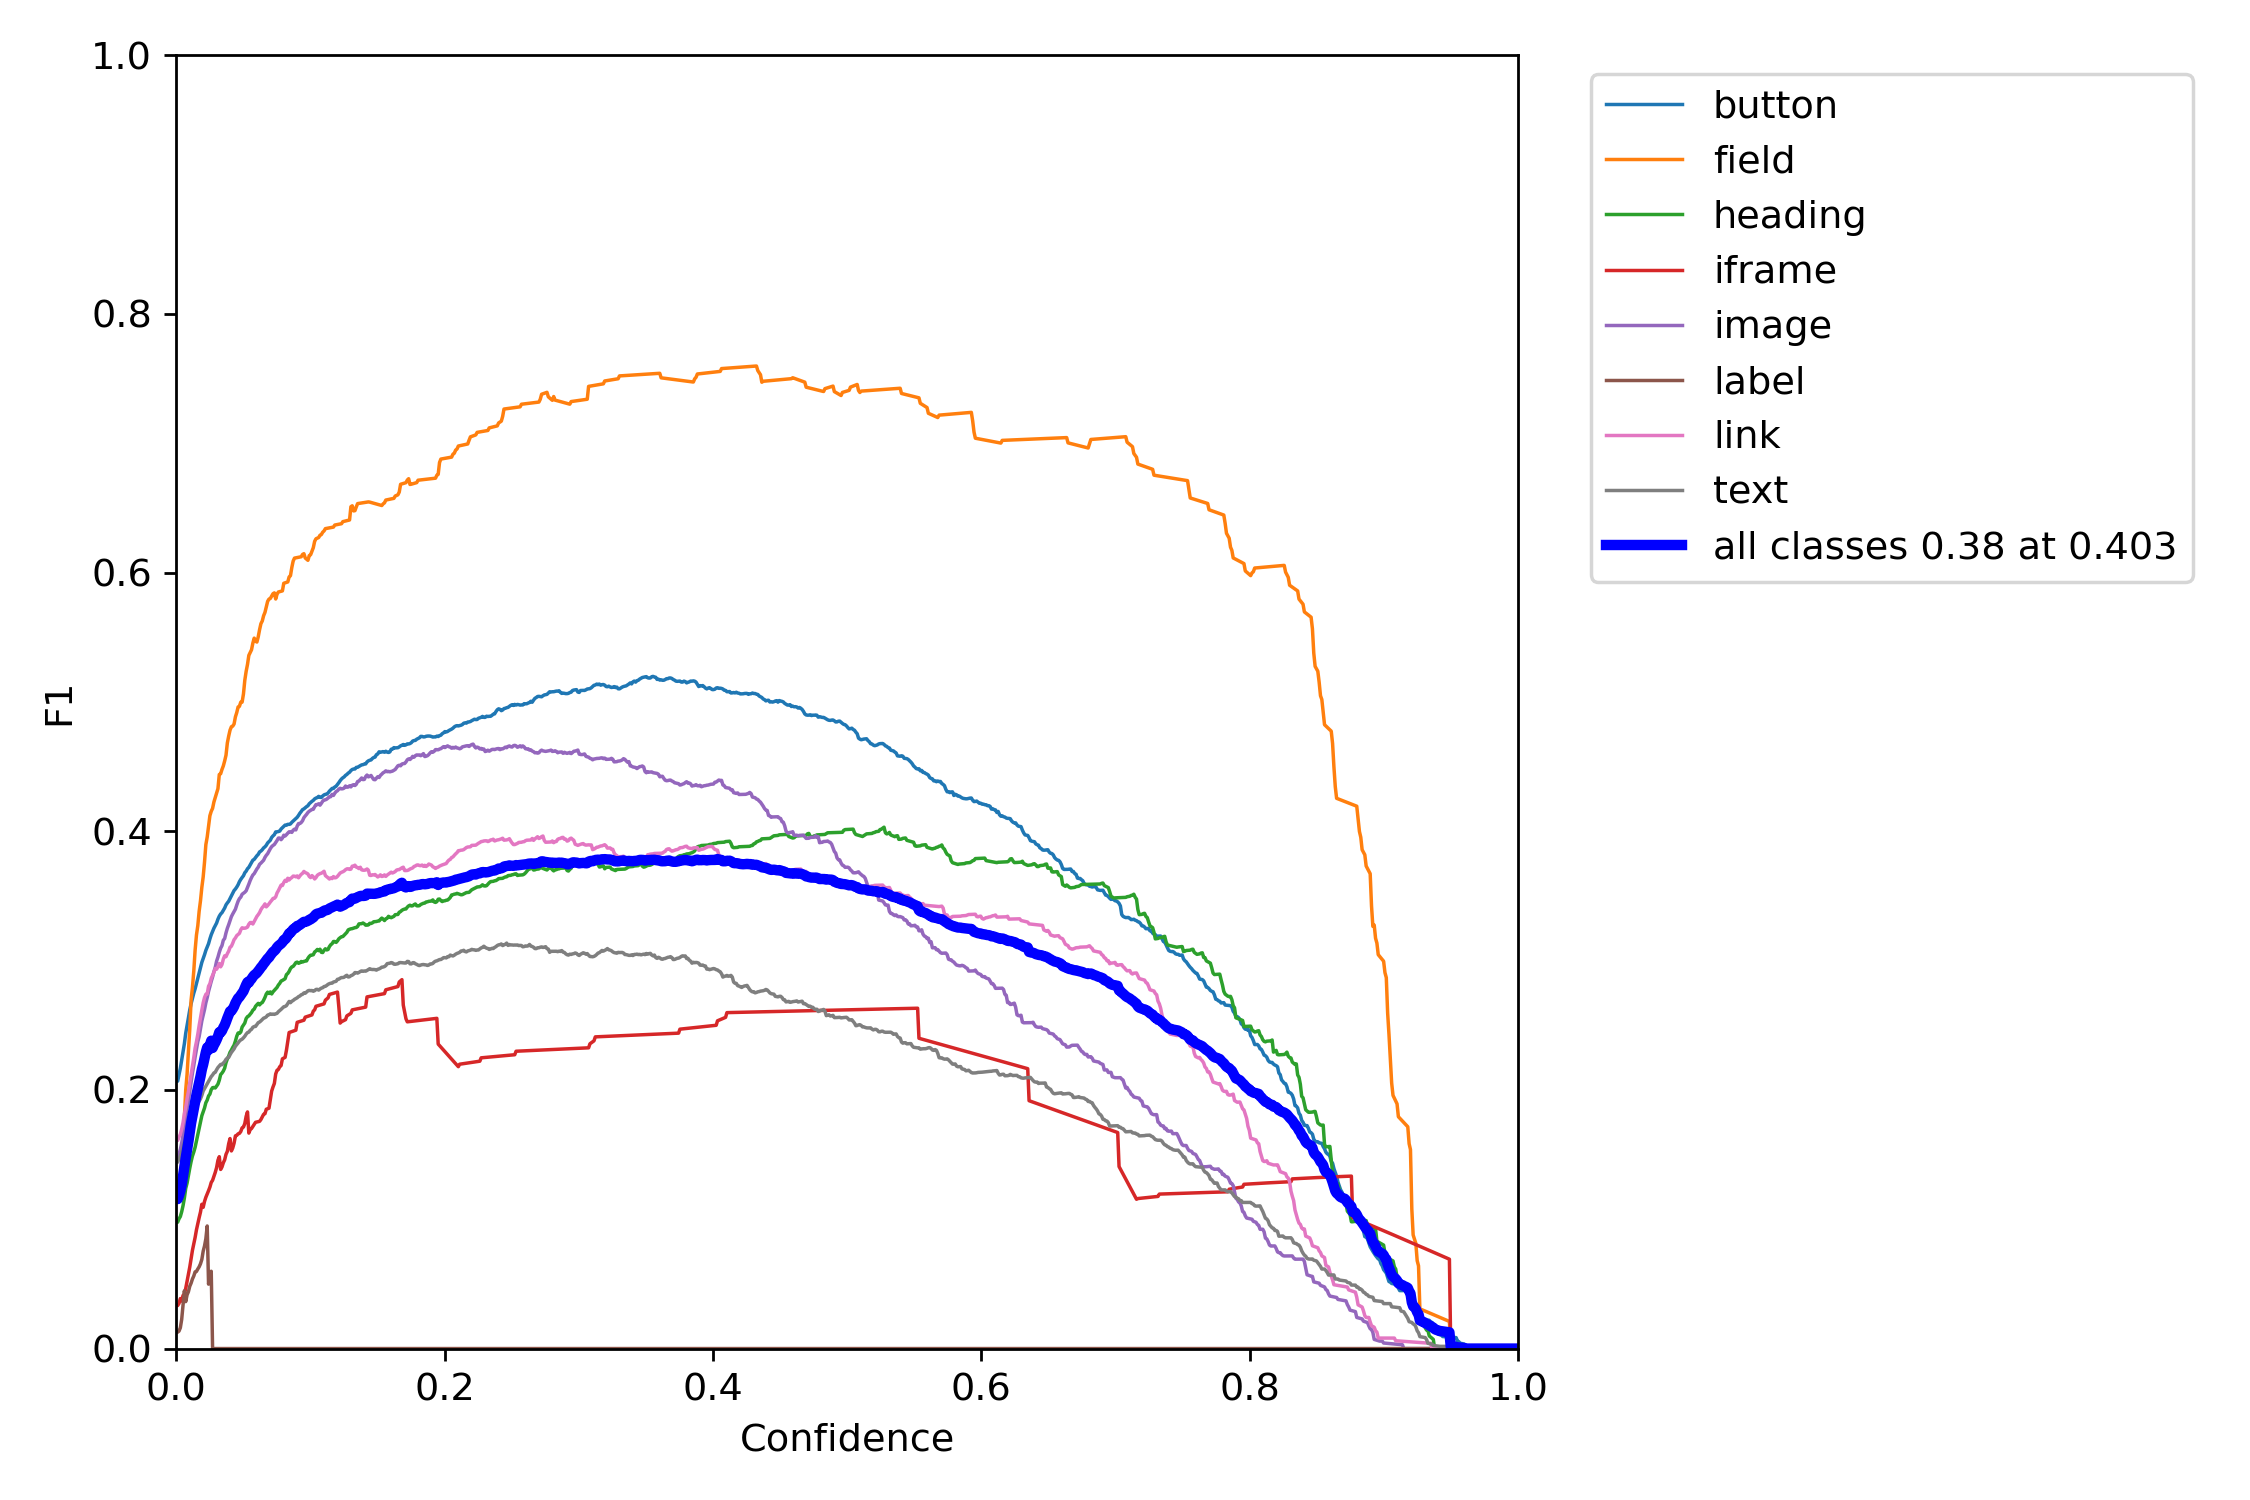

In [28]:
Image(filename='runs/test/exp2/F1_curve.png', width=800)

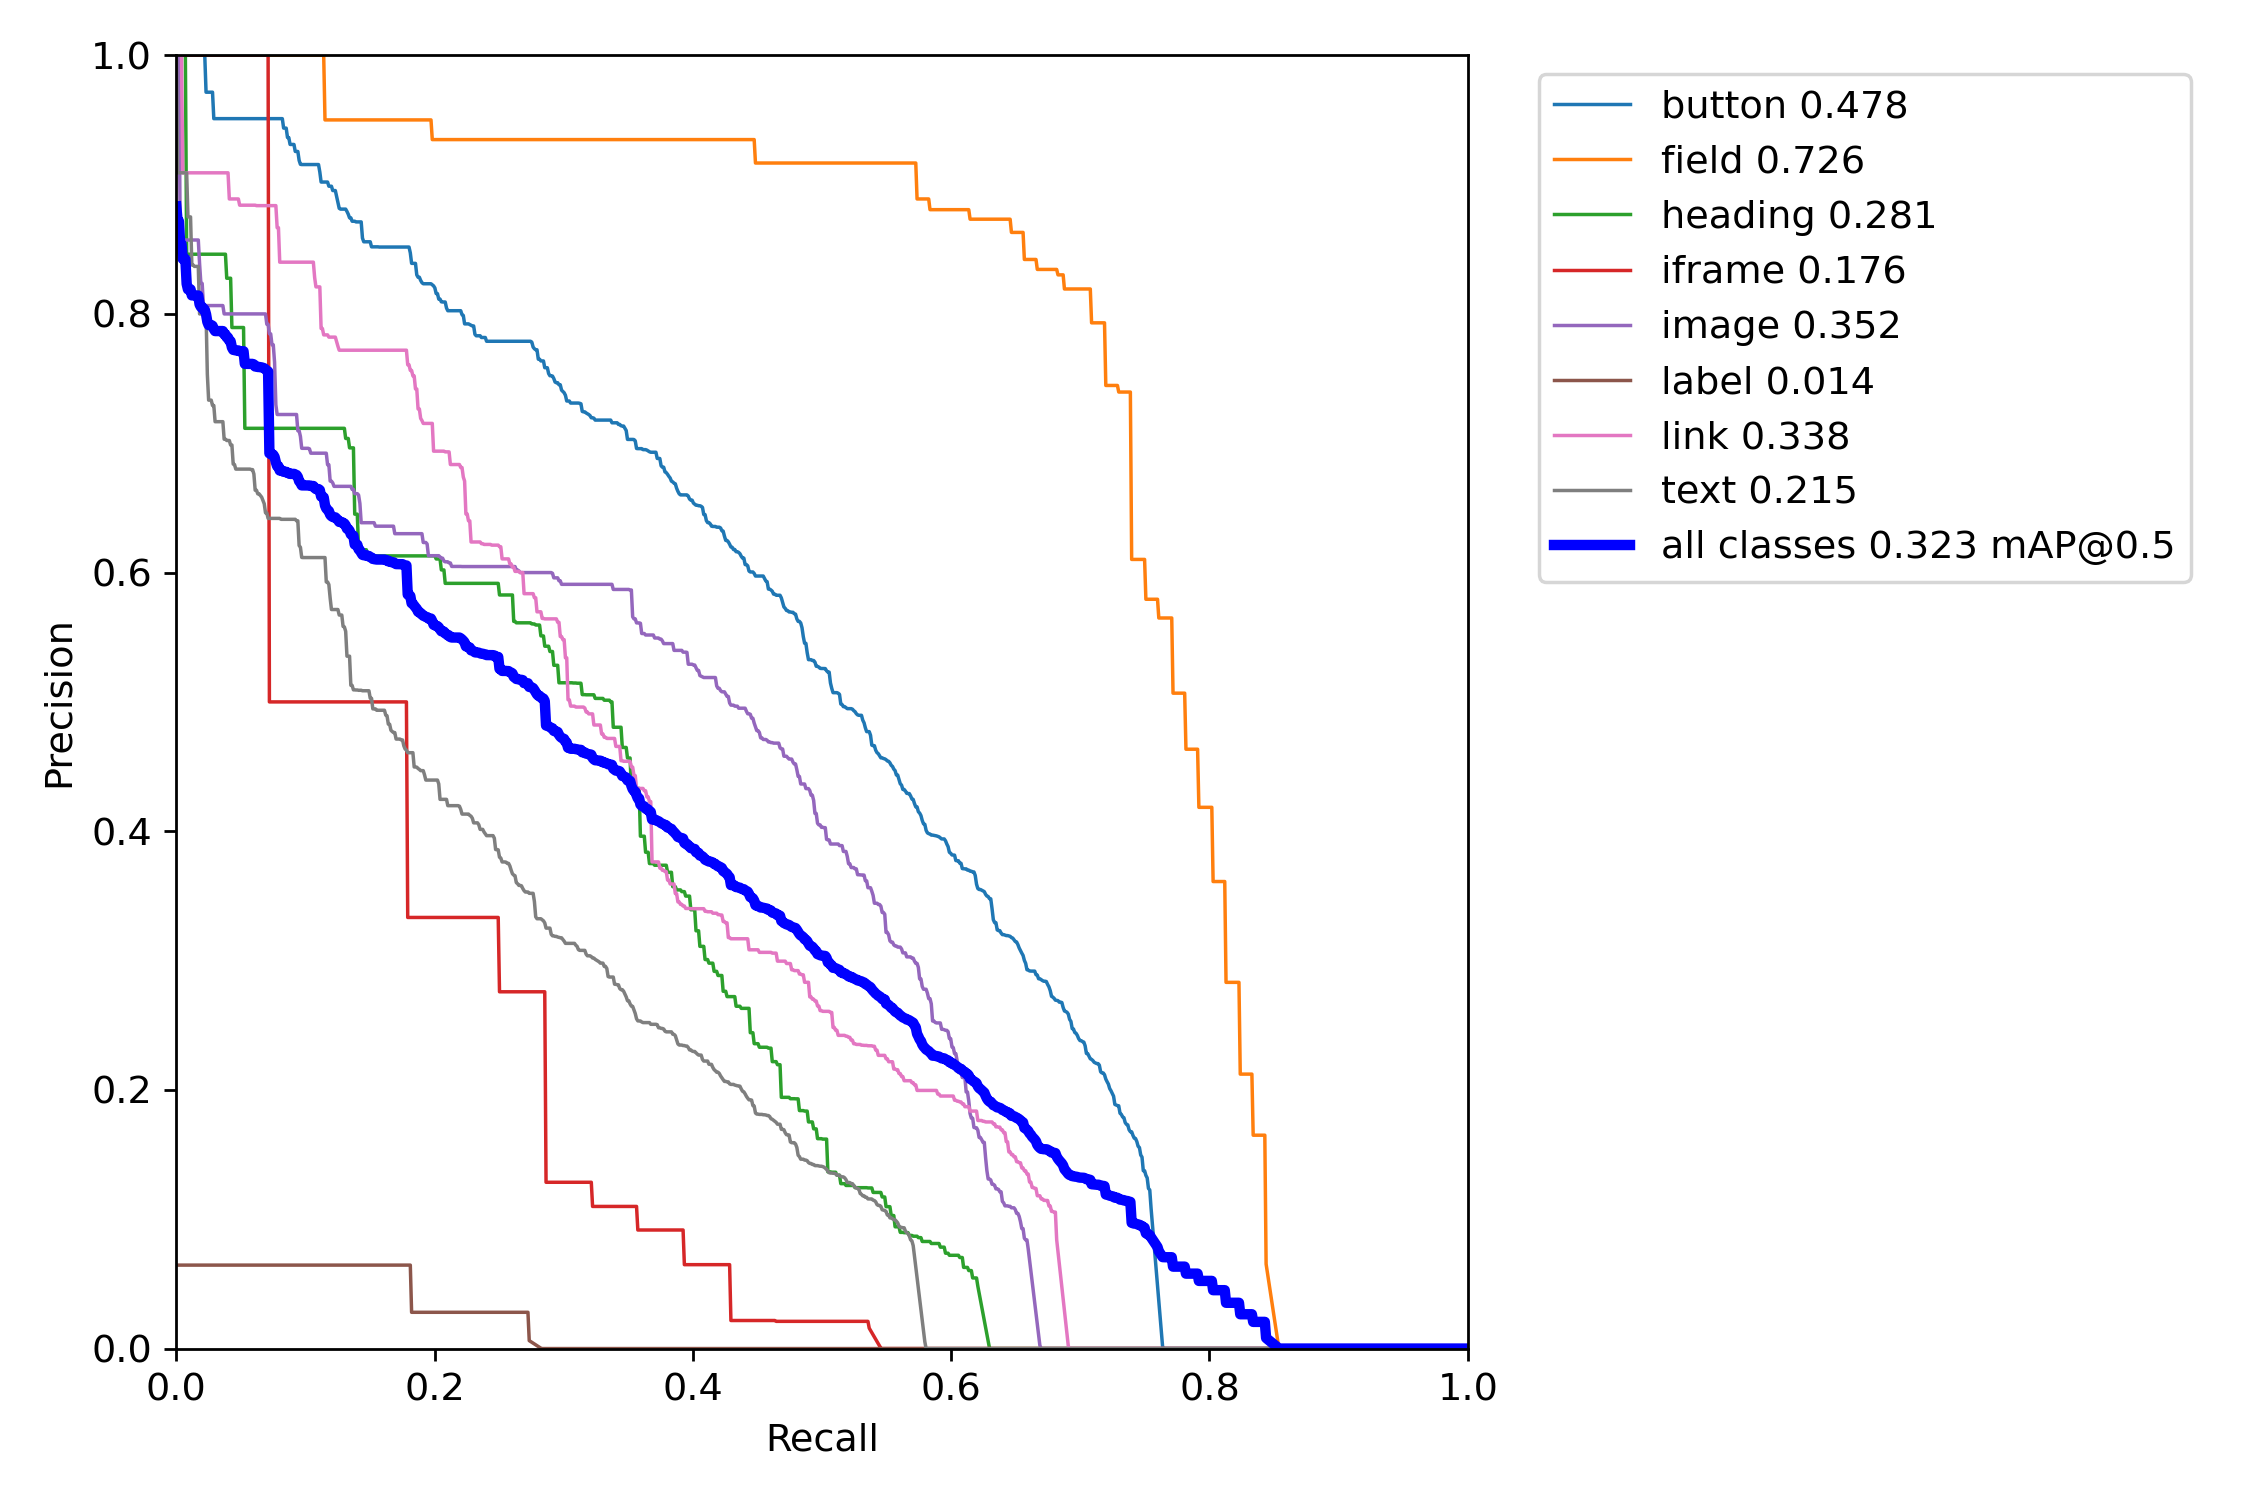

In [29]:
Image(filename='runs/test/exp2/PR_curve.png', width=800)

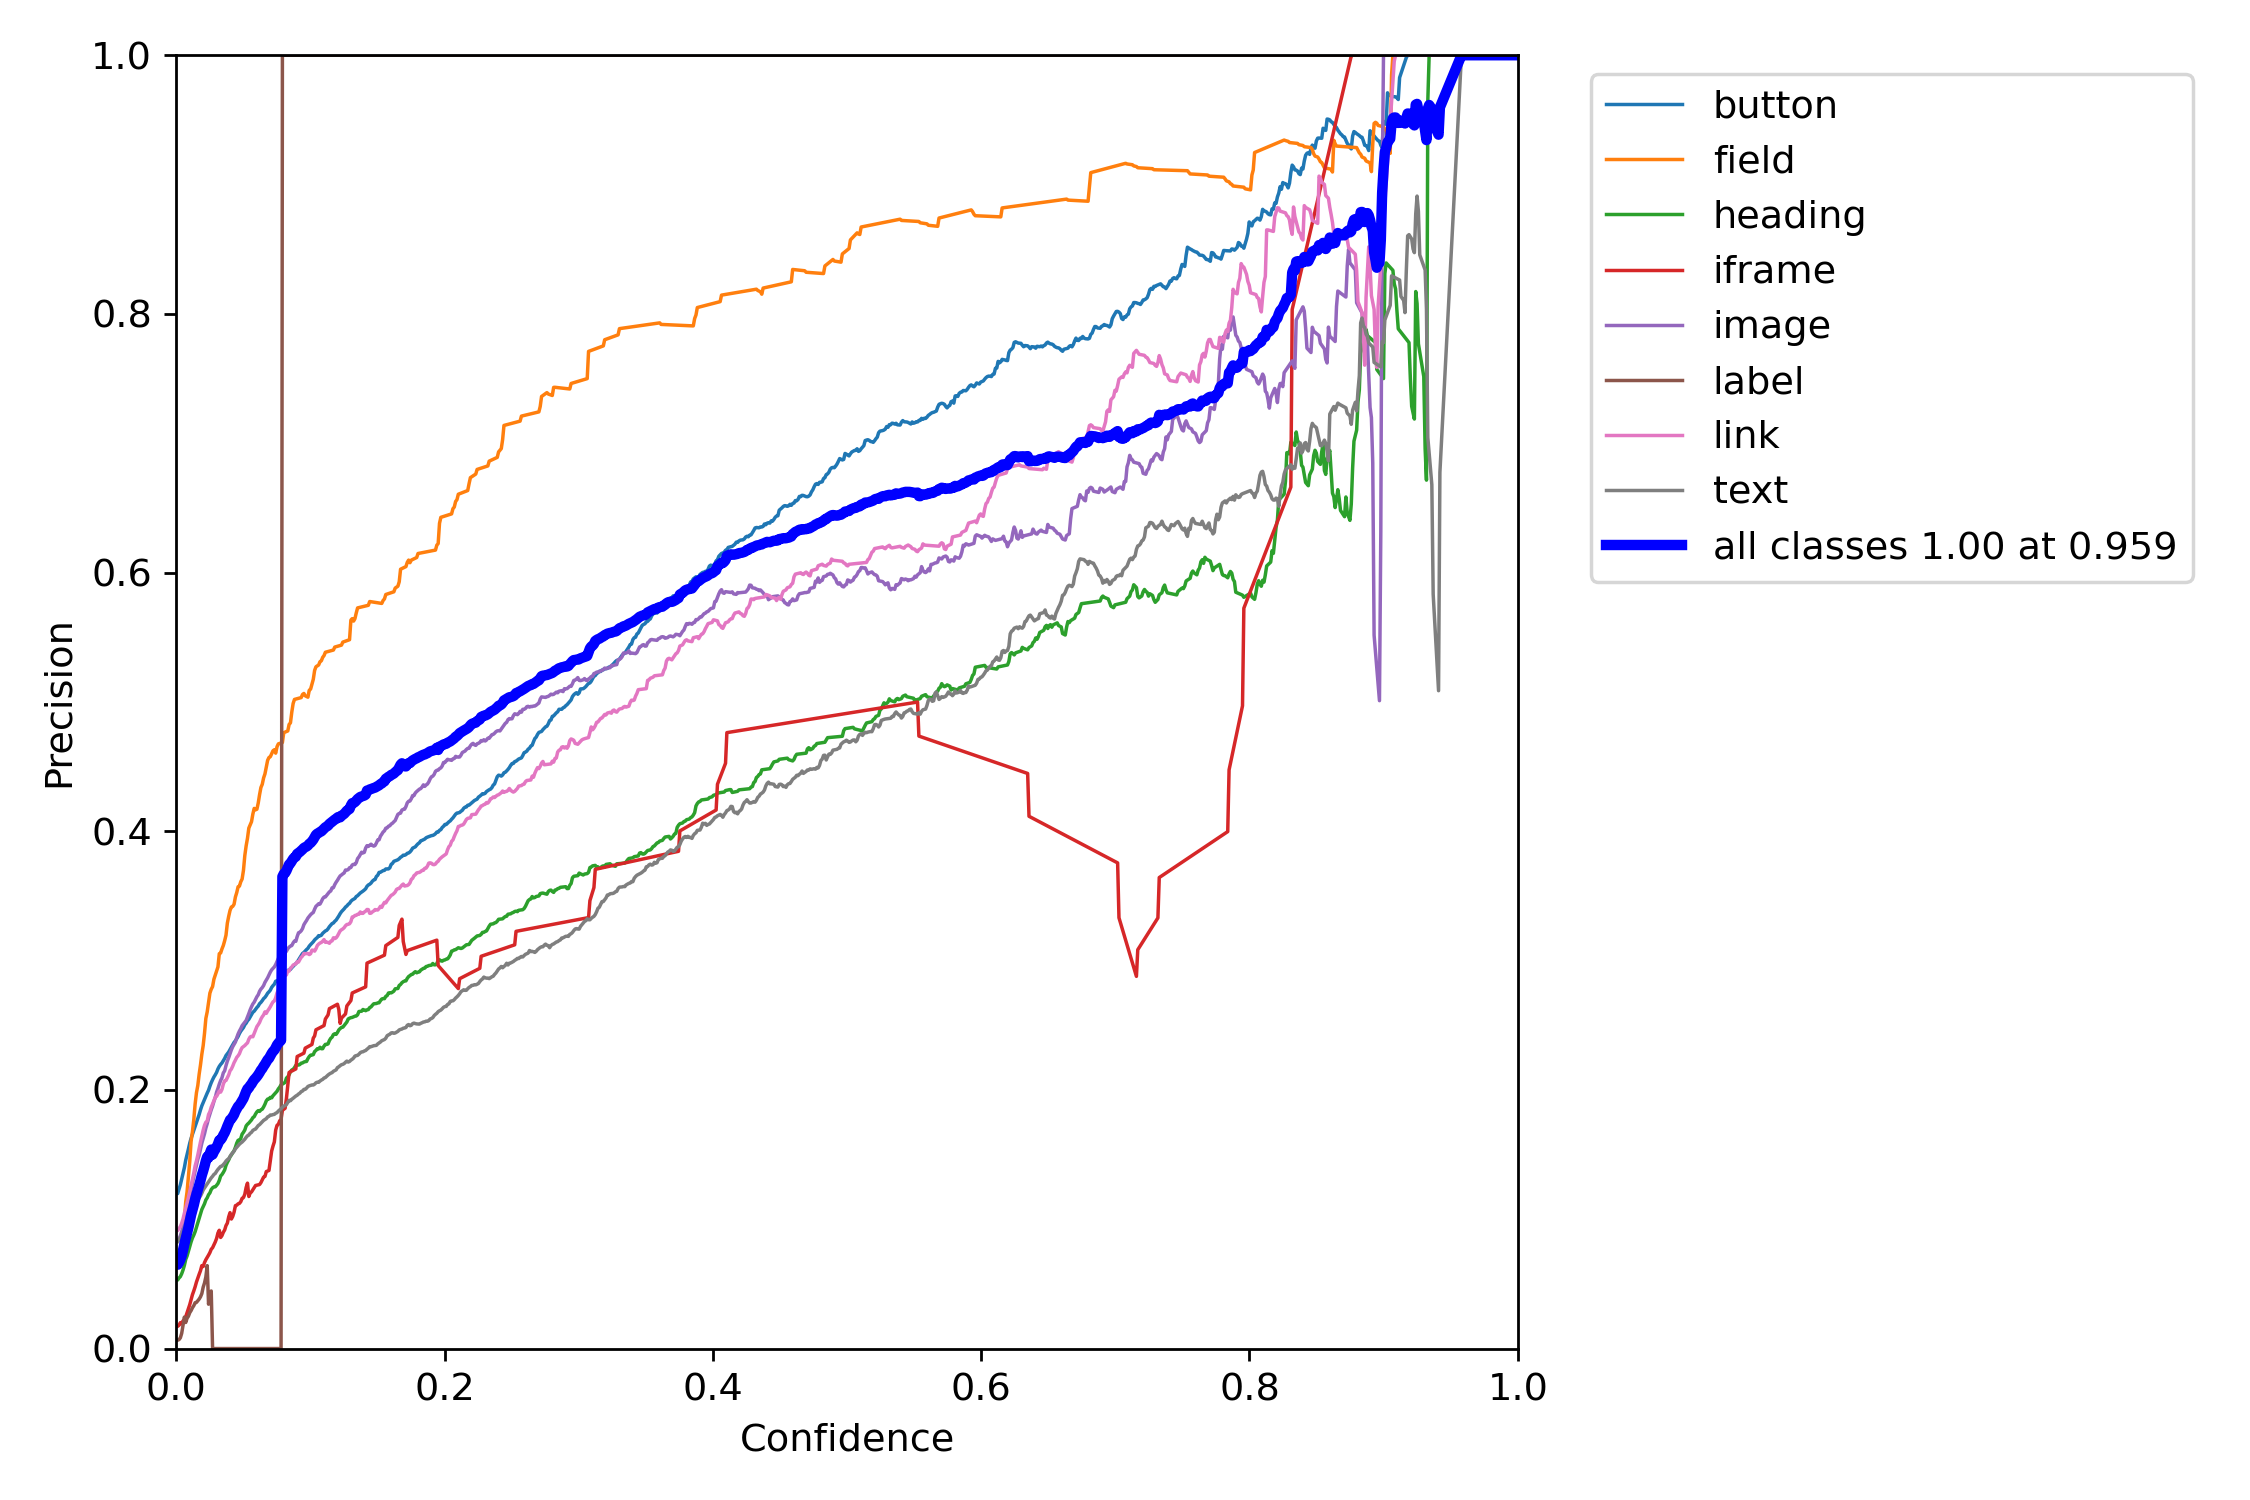

In [30]:
Image(filename='runs/test/exp2/P_curve.png', width=800)

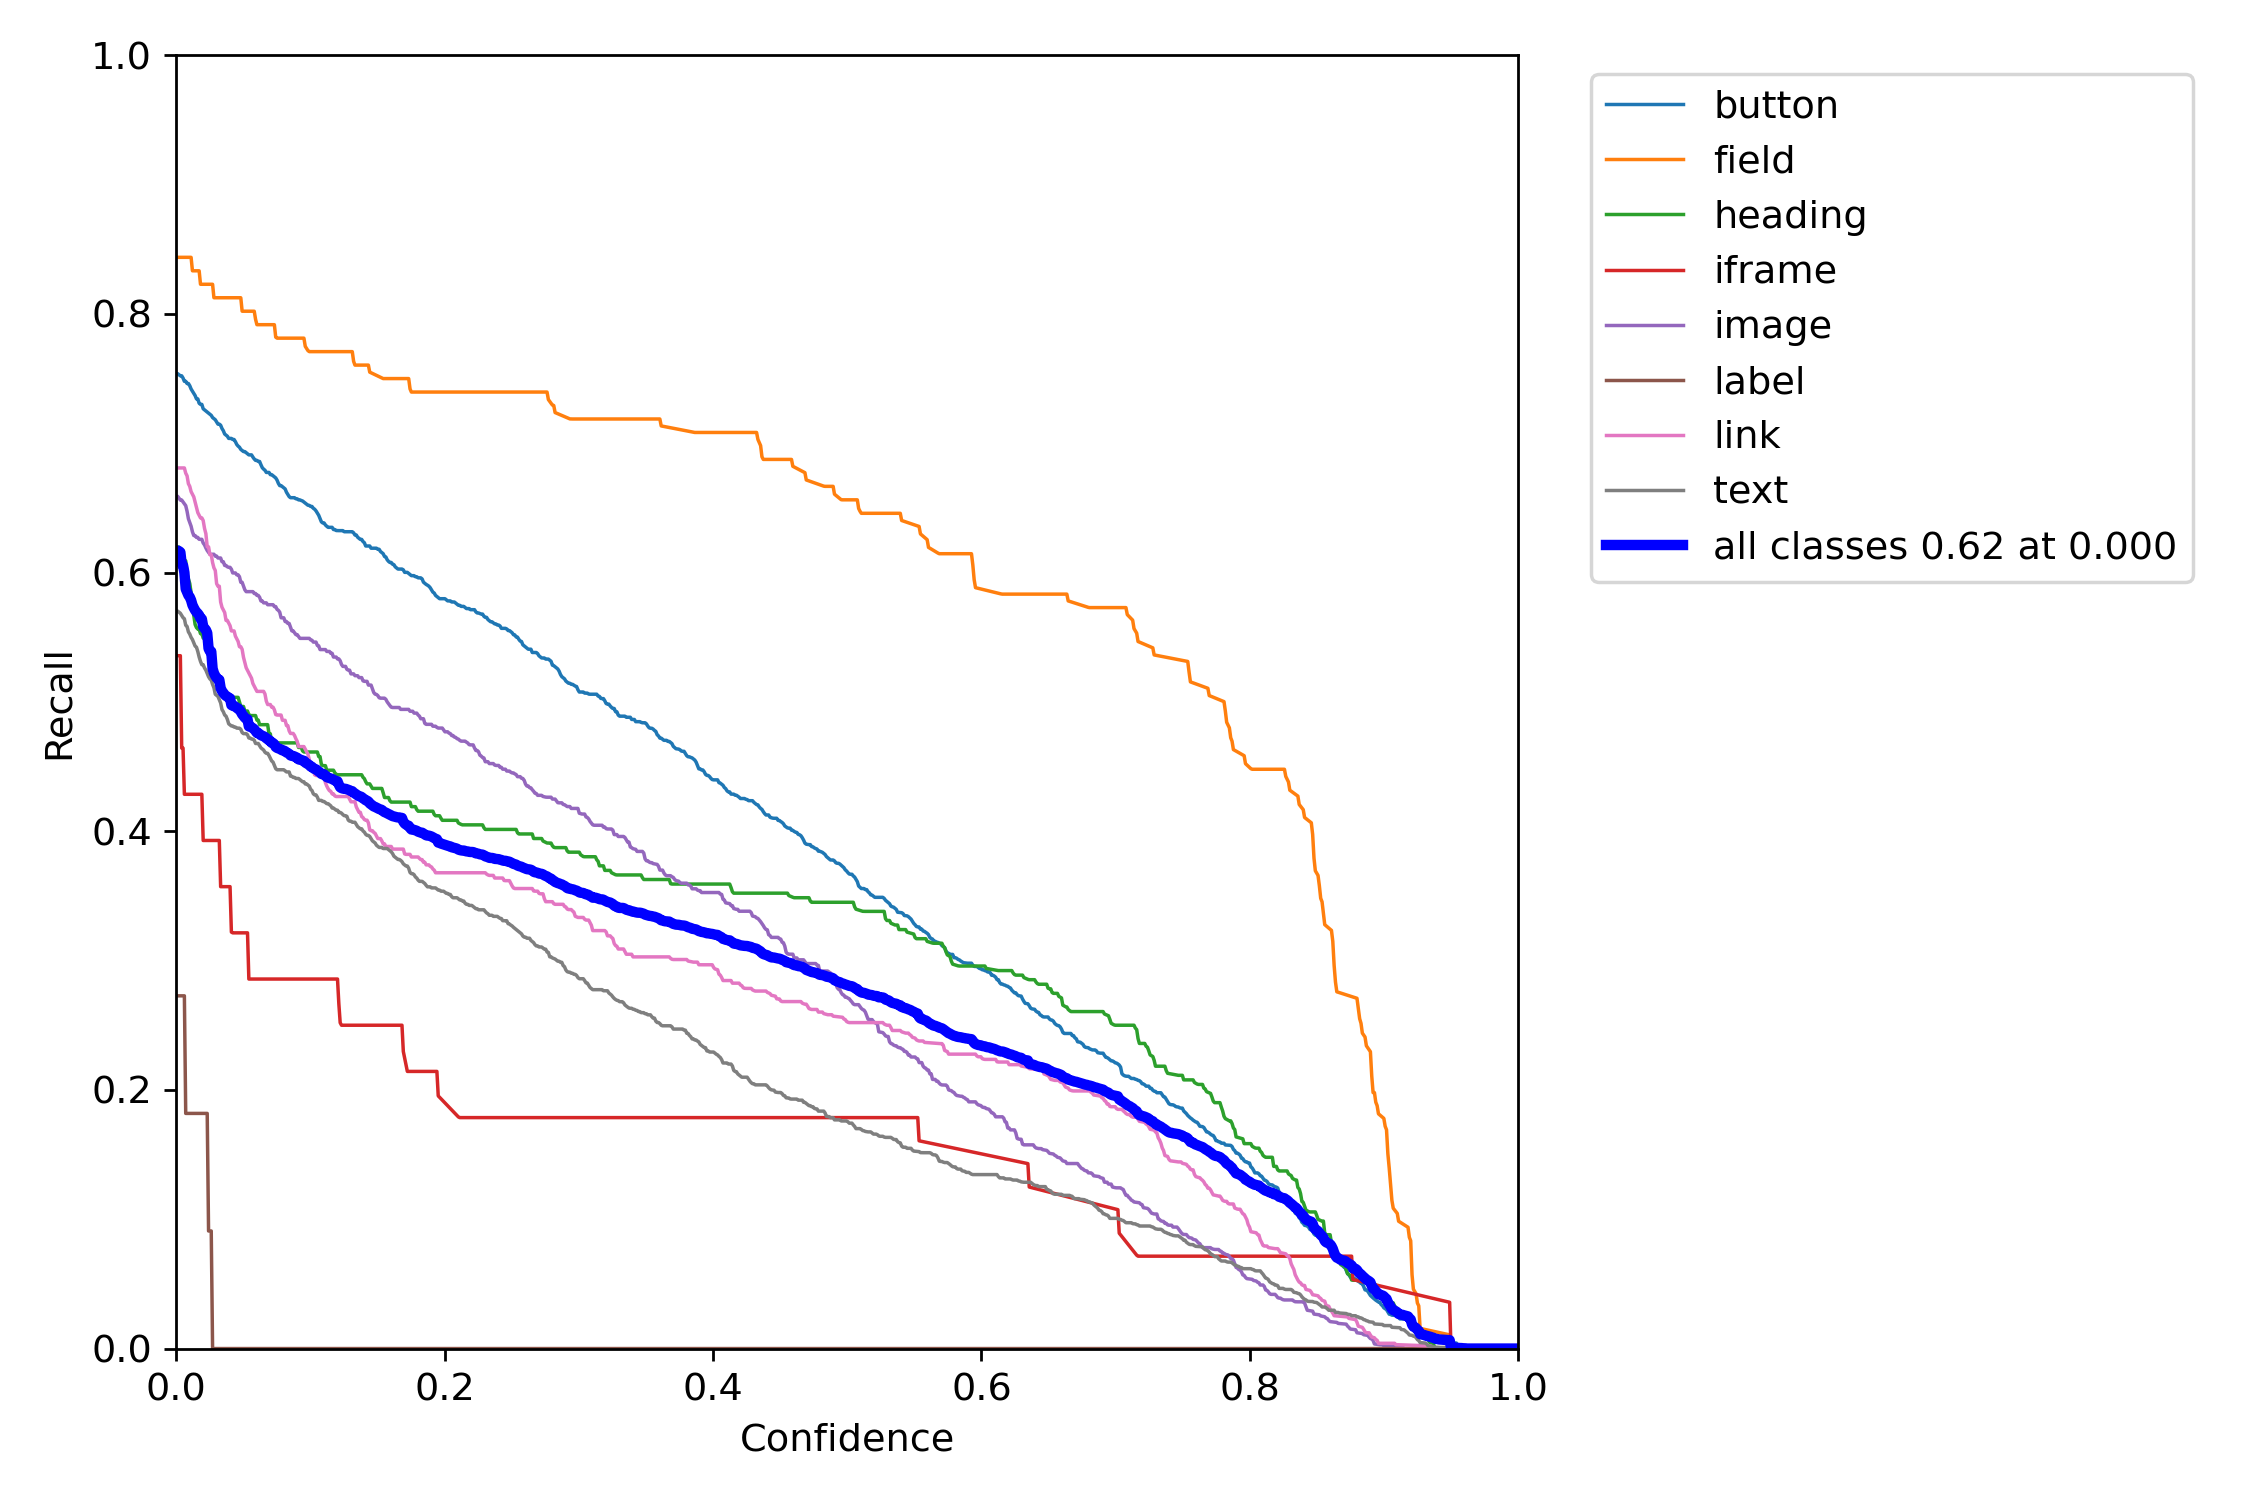

In [31]:
Image(filename='runs/test/exp2/R_curve.png', width=800)

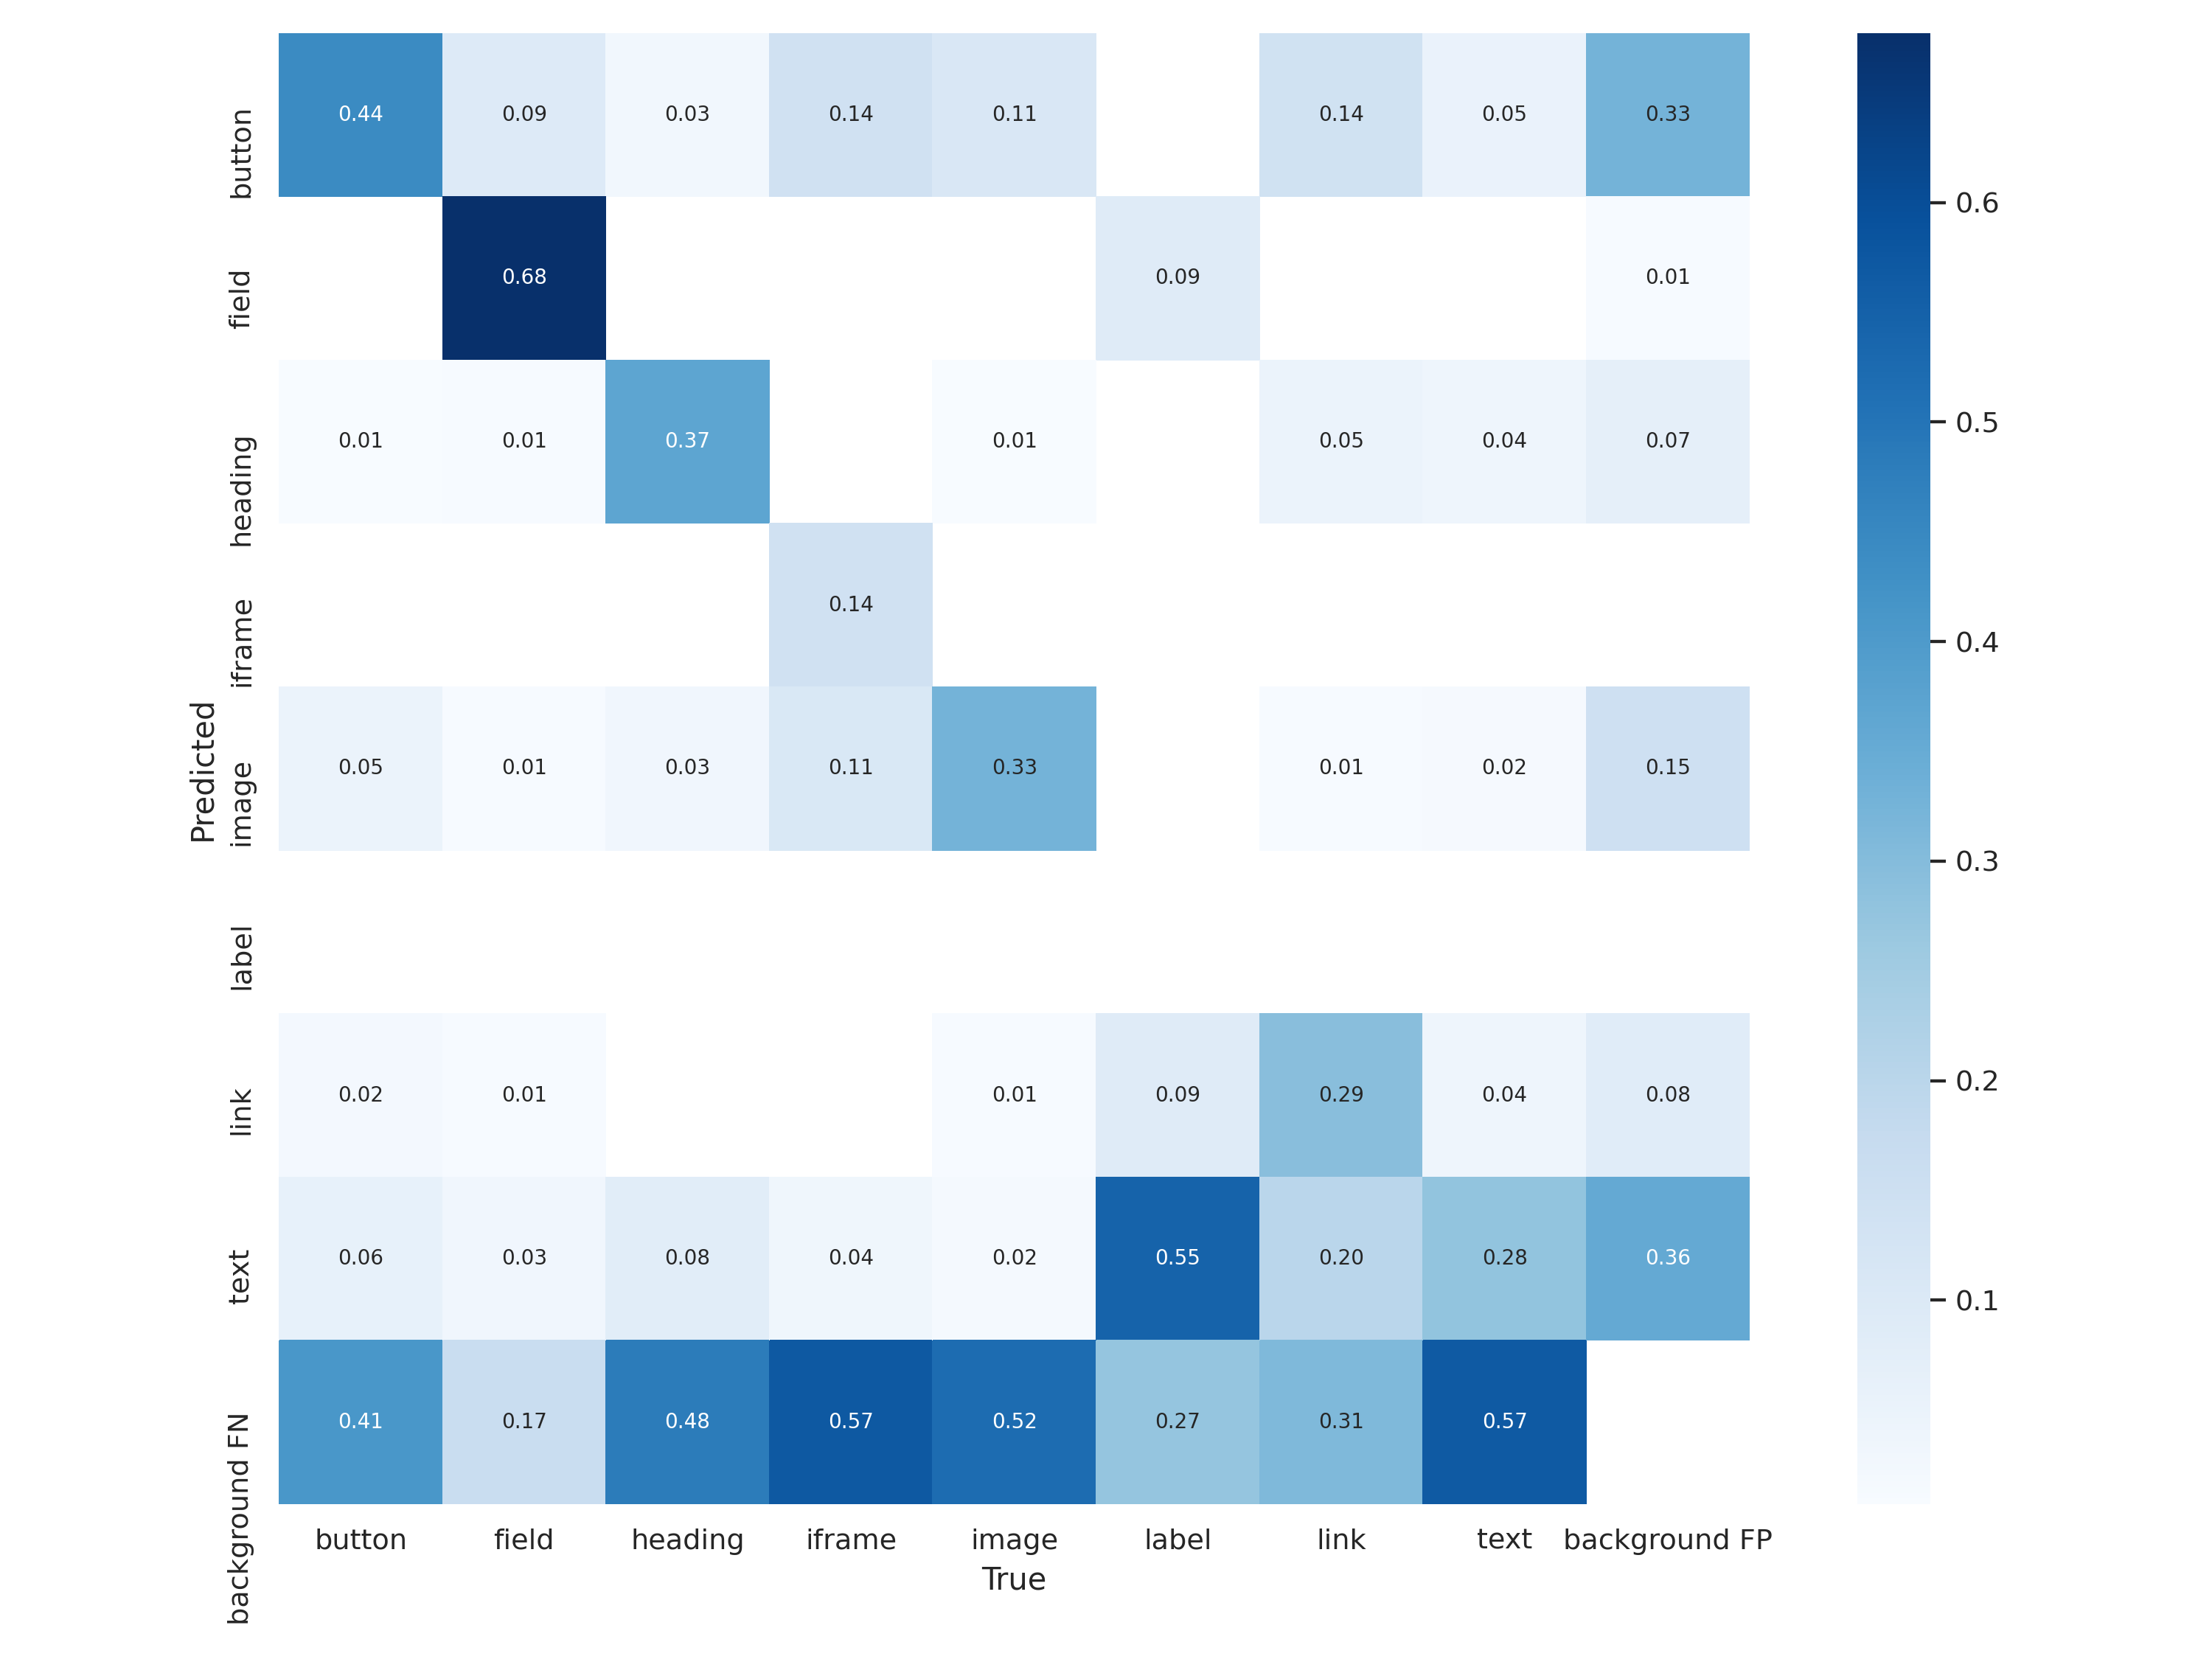

In [32]:
Image(filename='runs/test/exp2/confusion_matrix.png', width=800)

# 7. VISUALIZE TRAINING

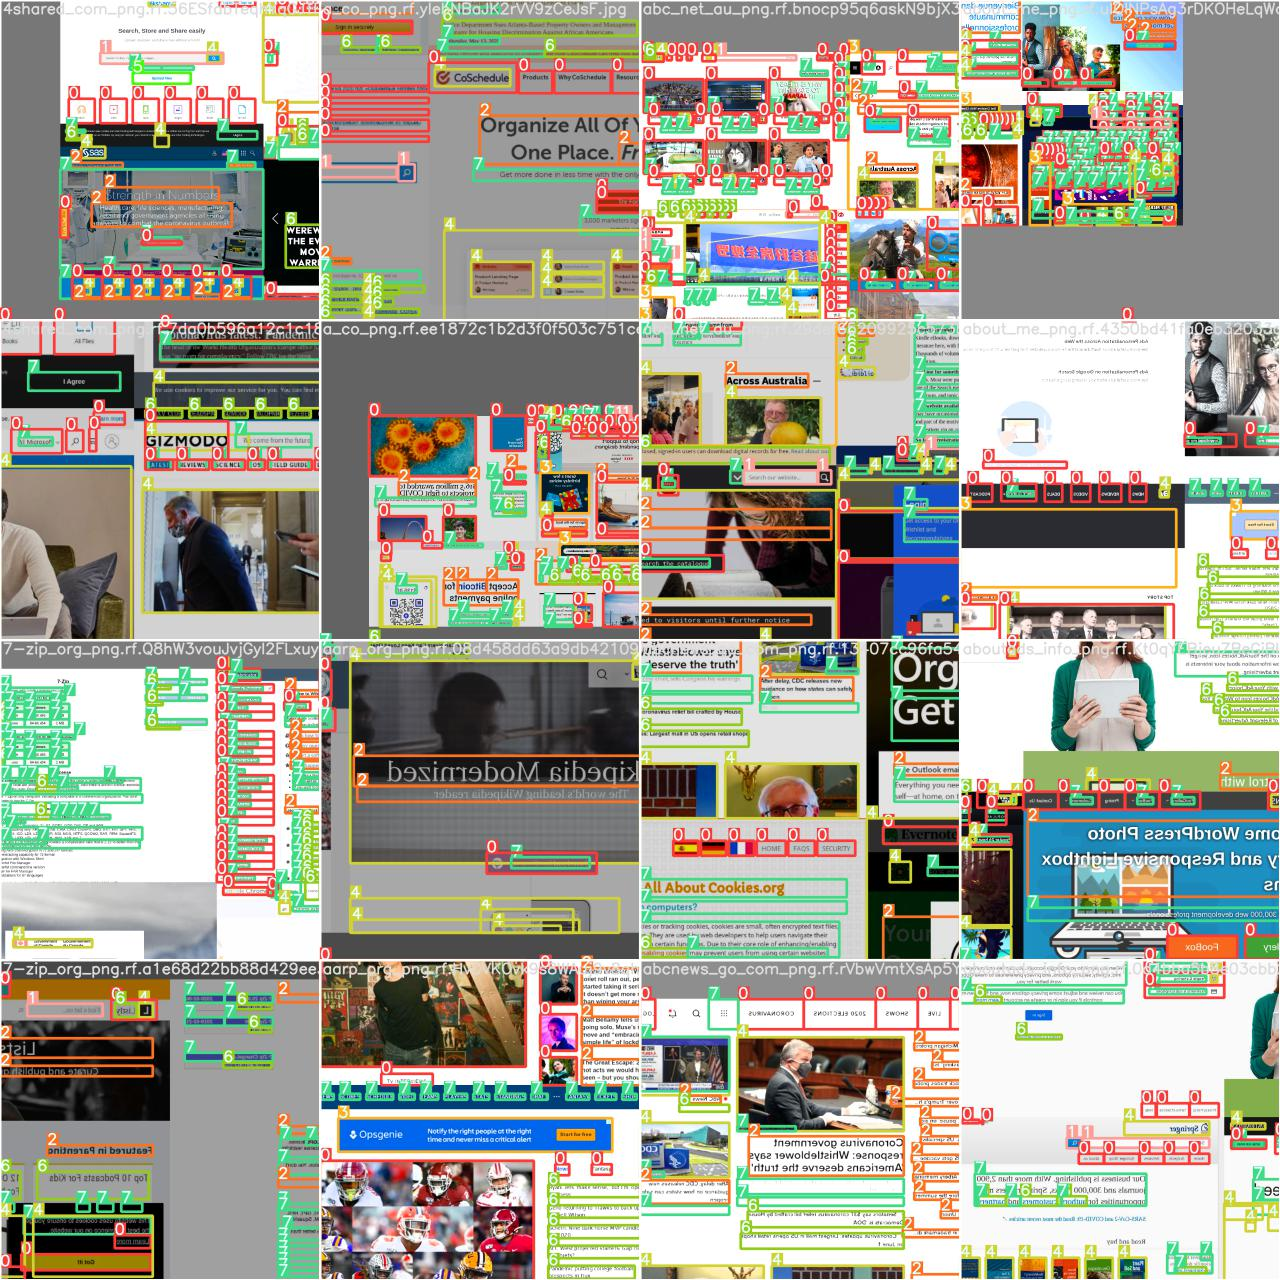

In [21]:
Image(filename='runs/train/exp/train_batch0.jpg', width=800)  # train batch 0 mosaics and labels

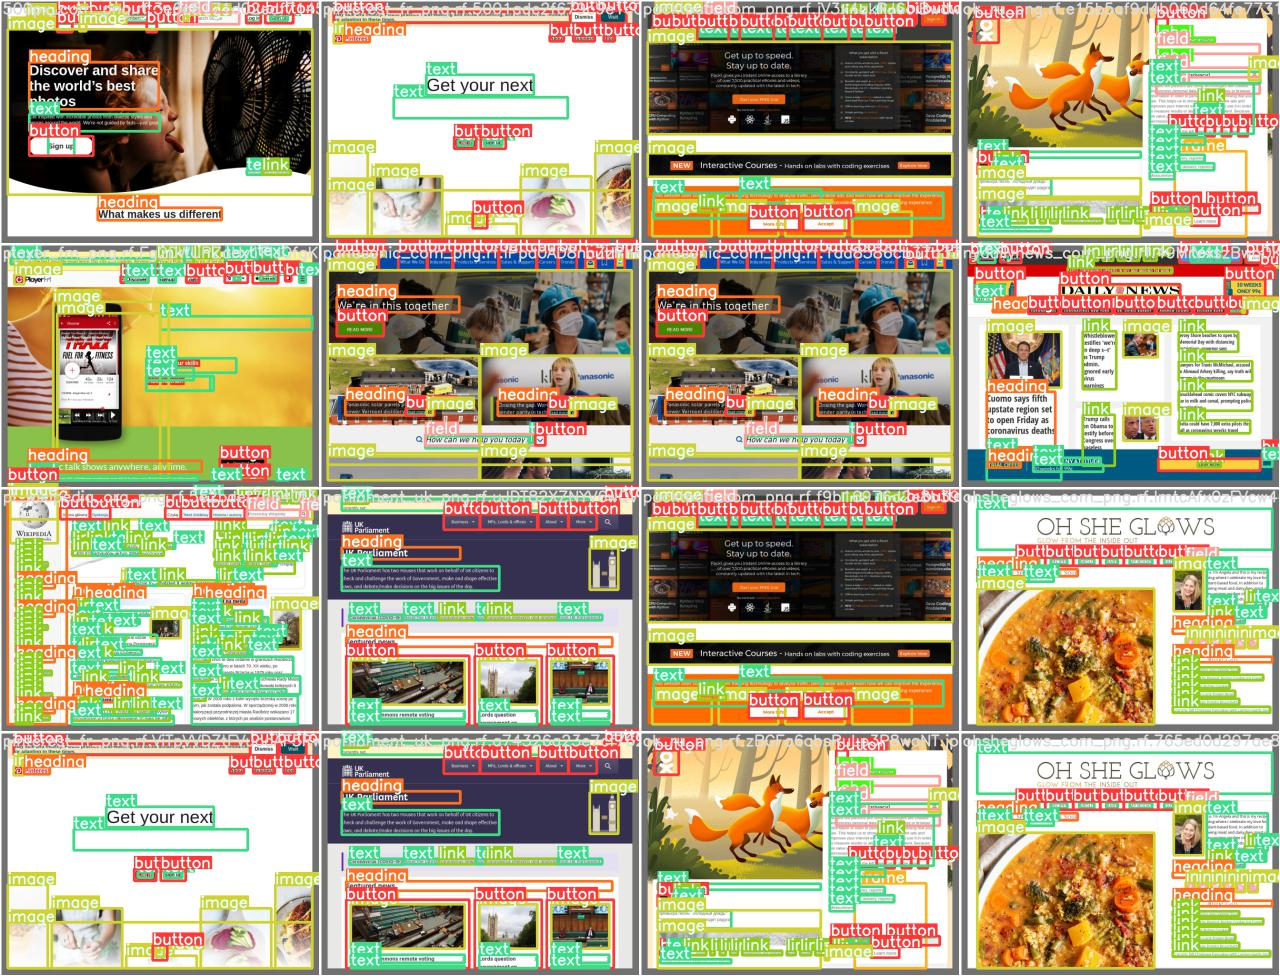

In [22]:
Image(filename='runs/train/exp/test_batch0_labels.jpg', width=800)  # test batch 0 labels

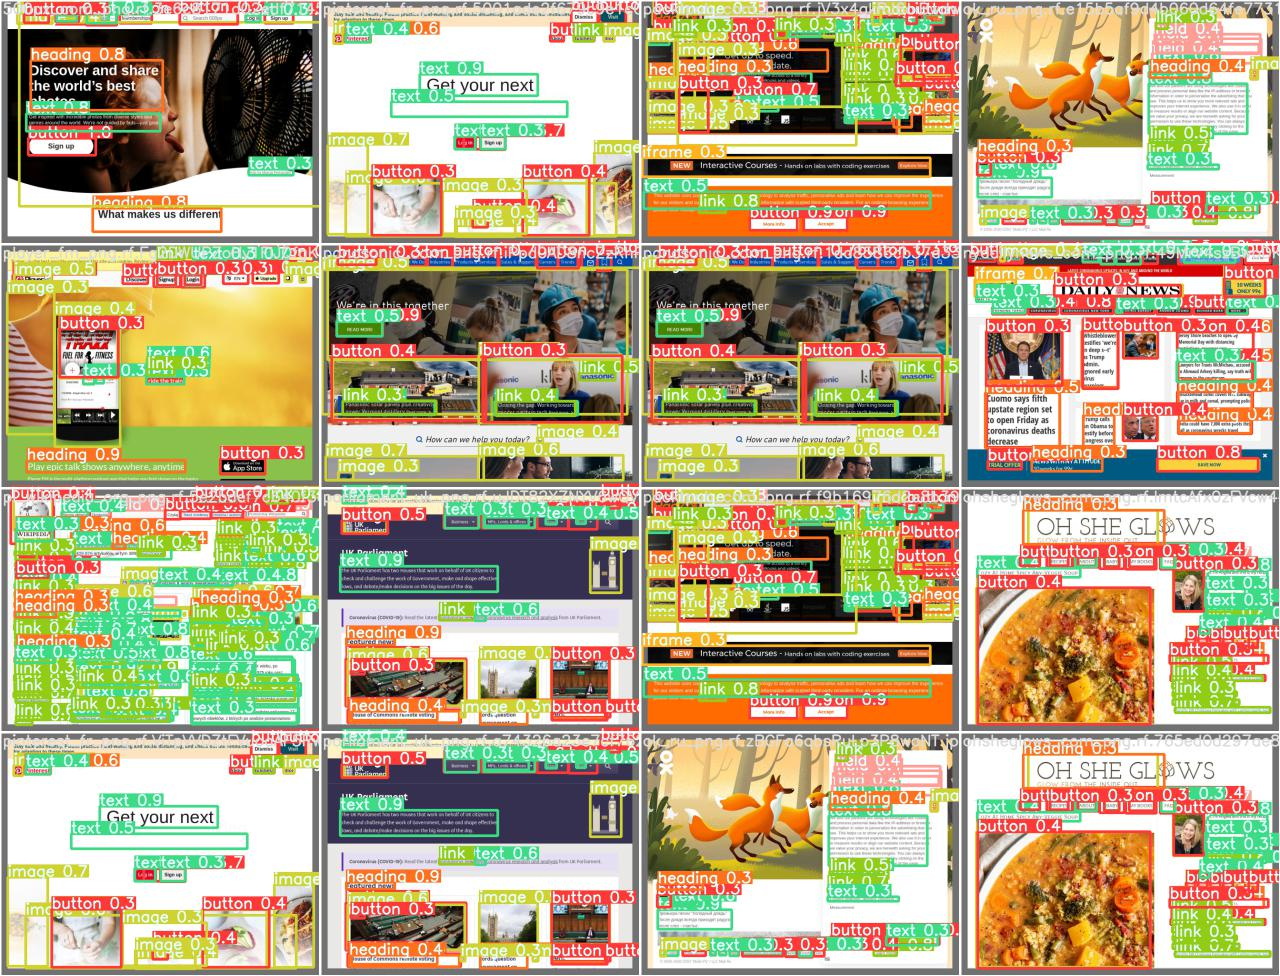

In [23]:
Image(filename='runs/train/exp/test_batch0_pred.jpg', width=800)  # test batch 0 predictions

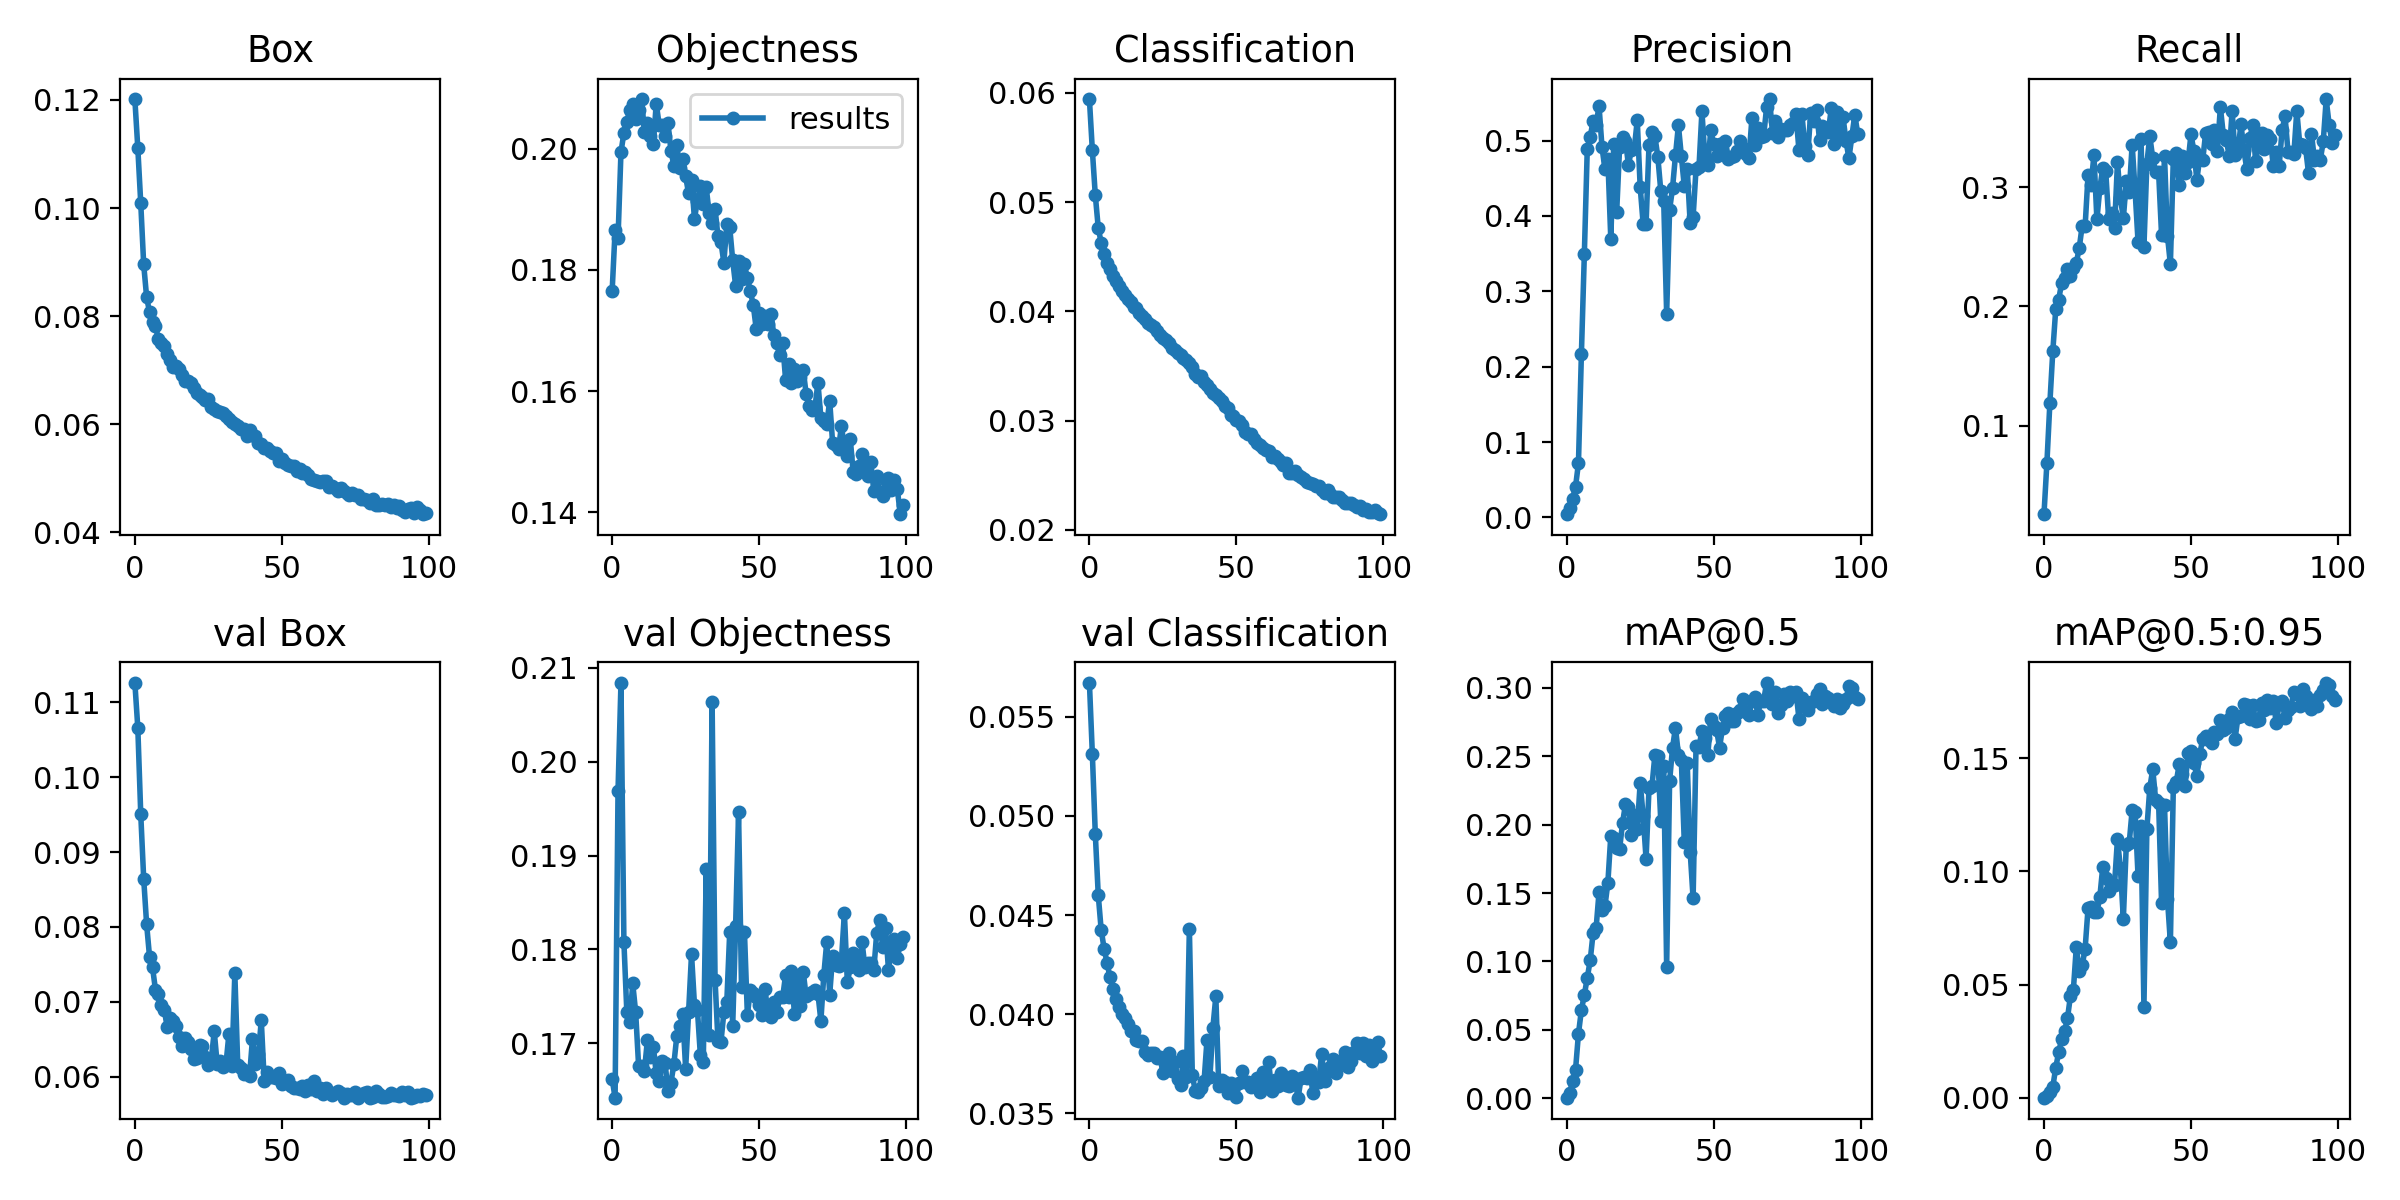

In [6]:
from utils.plots import plot_results 
plot_results(save_dir='runs/train/exp')  # plot all results*.txt as results.png
Image(filename='runs/train/exp/results.png', width=800)

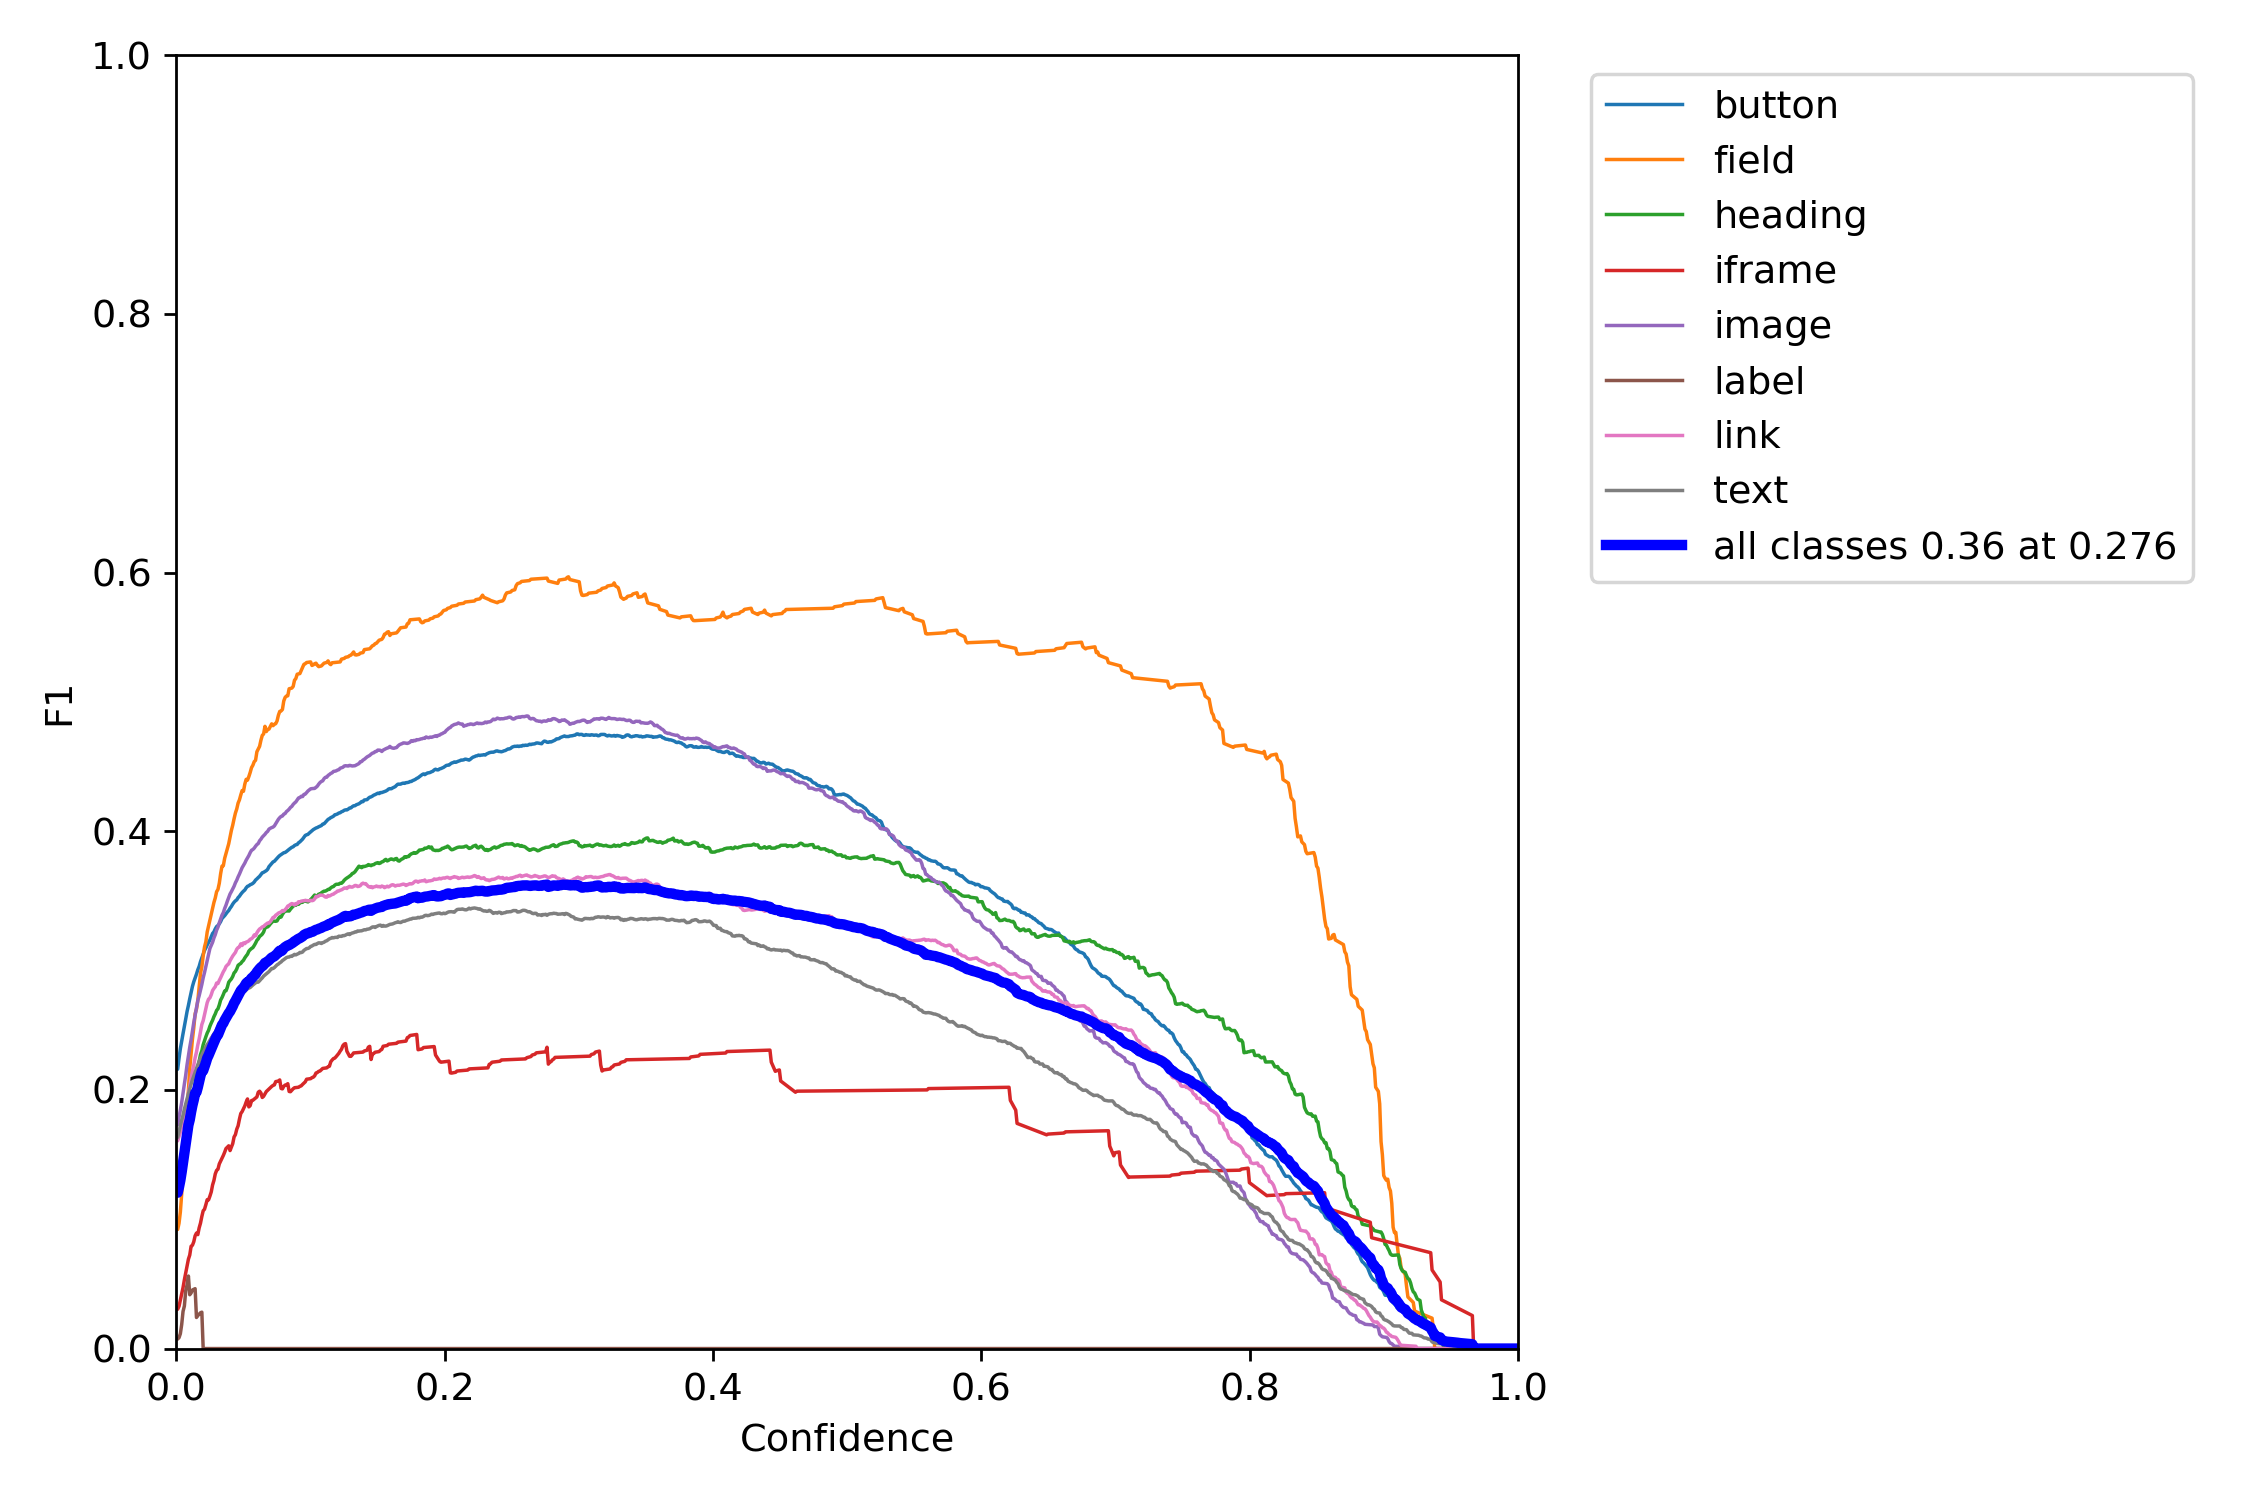

In [14]:
Image(filename='runs/train/exp/F1_curve.png', width=800)

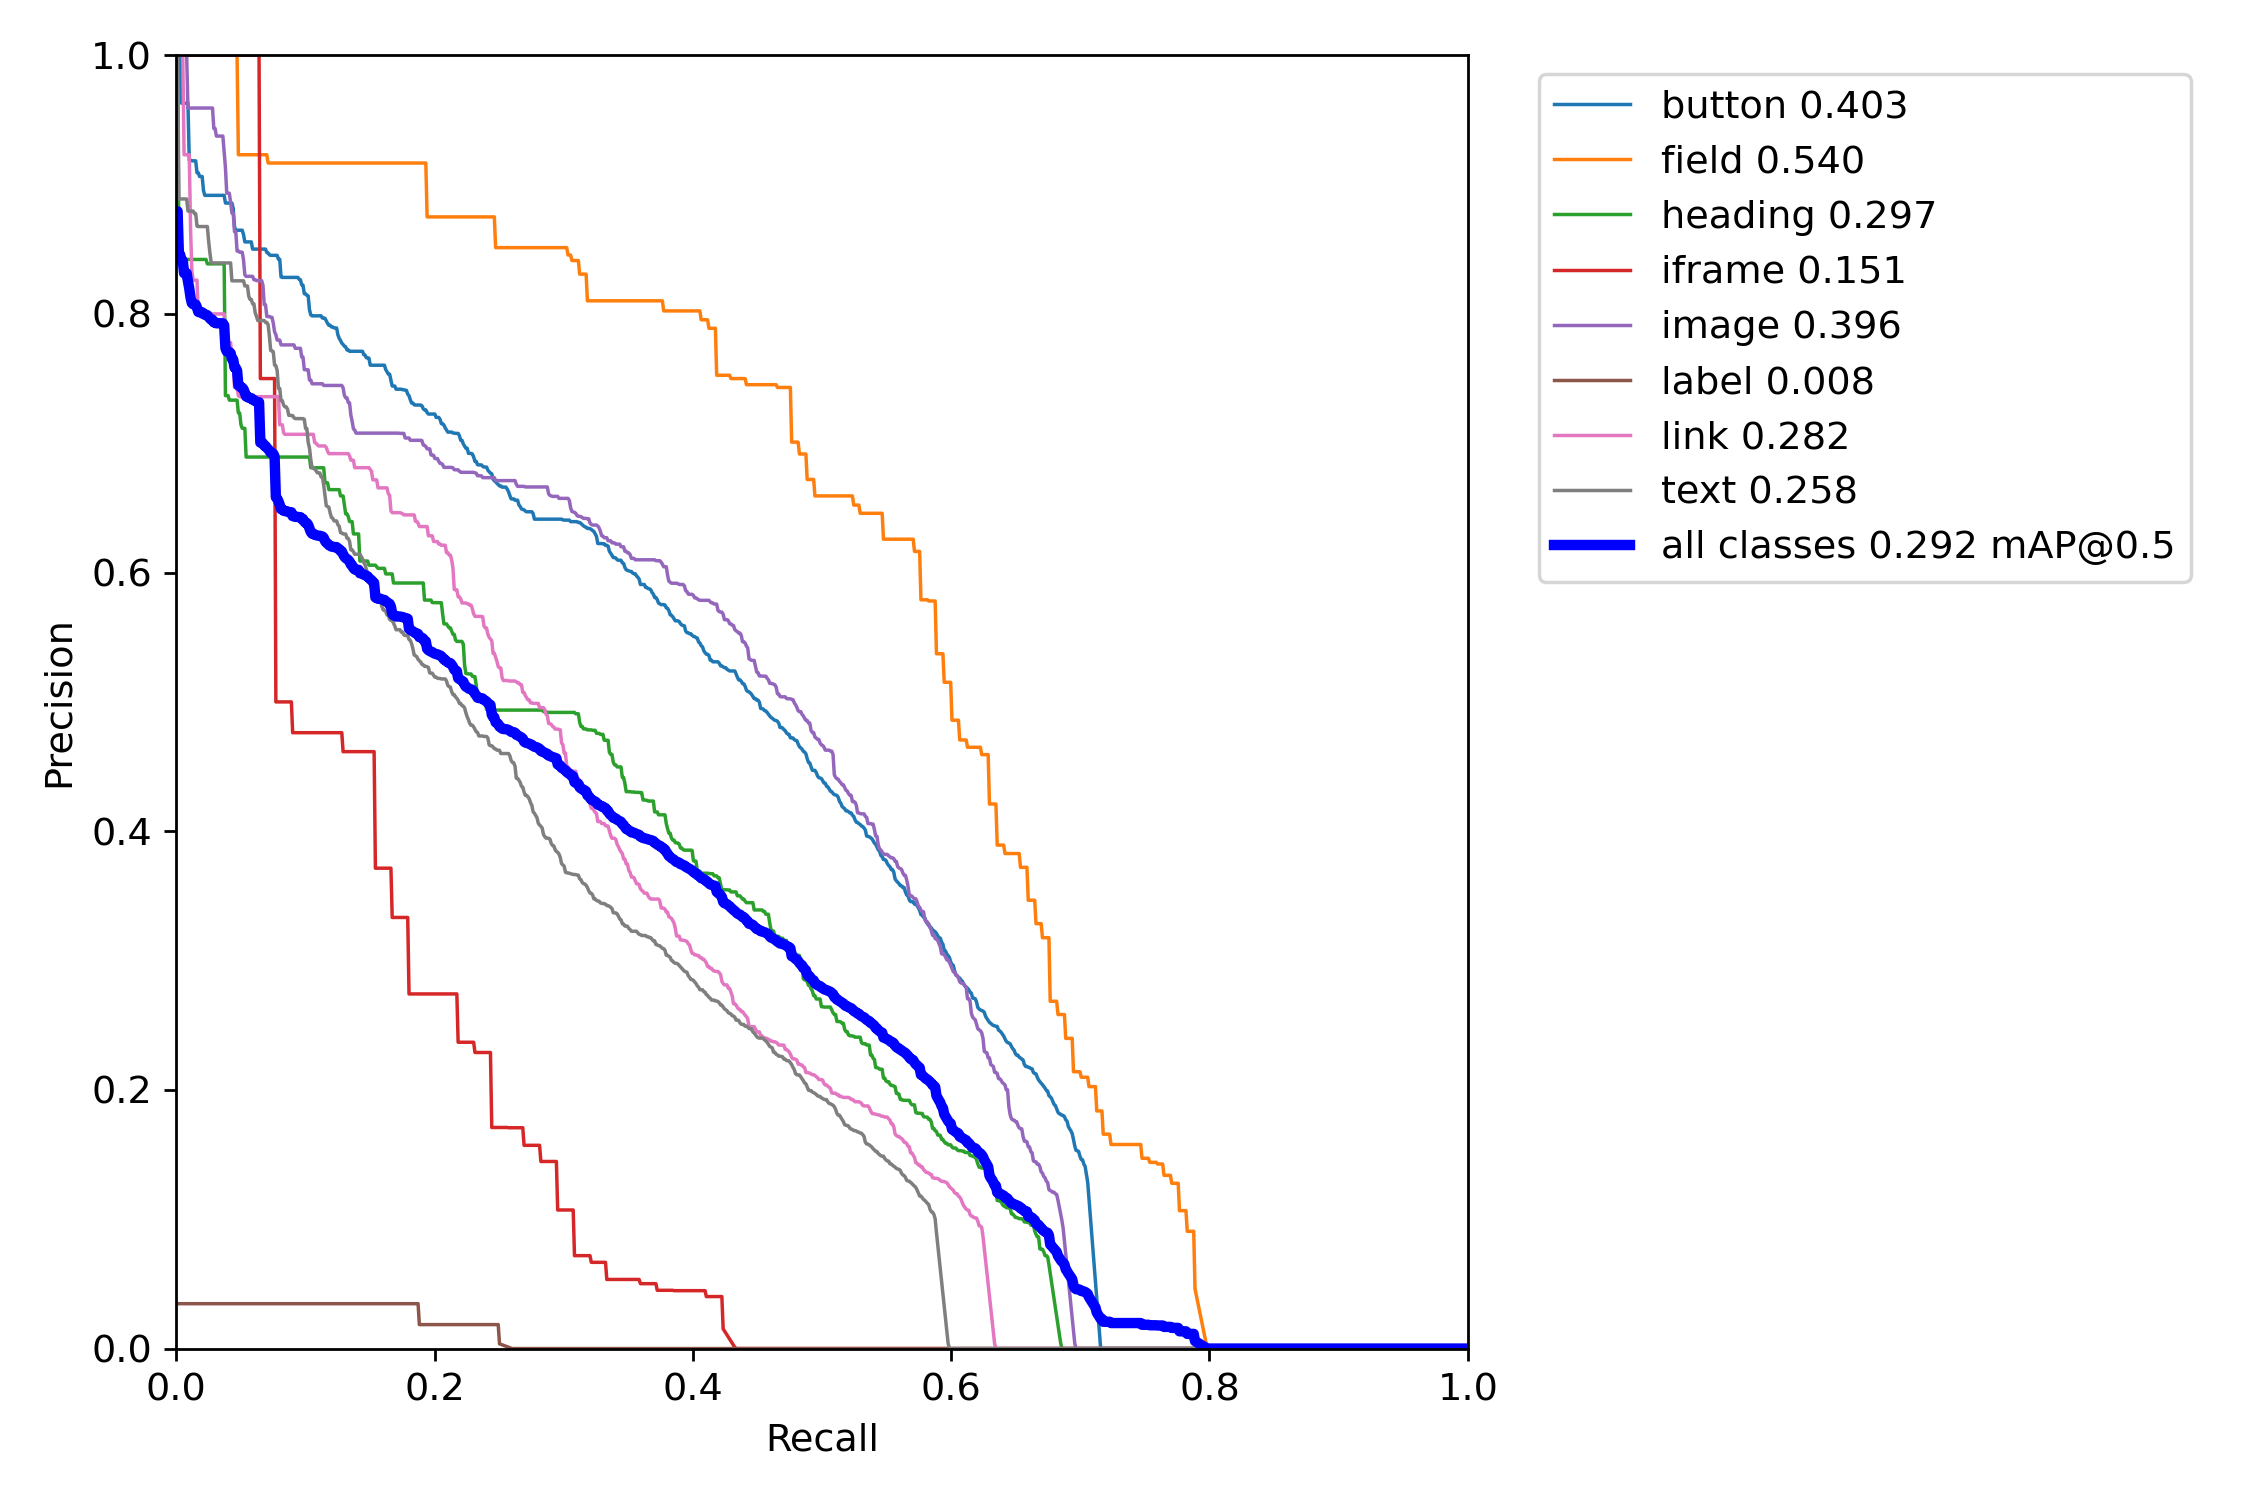

In [15]:
Image(filename='runs/train/exp/PR_curve.png', width=800)

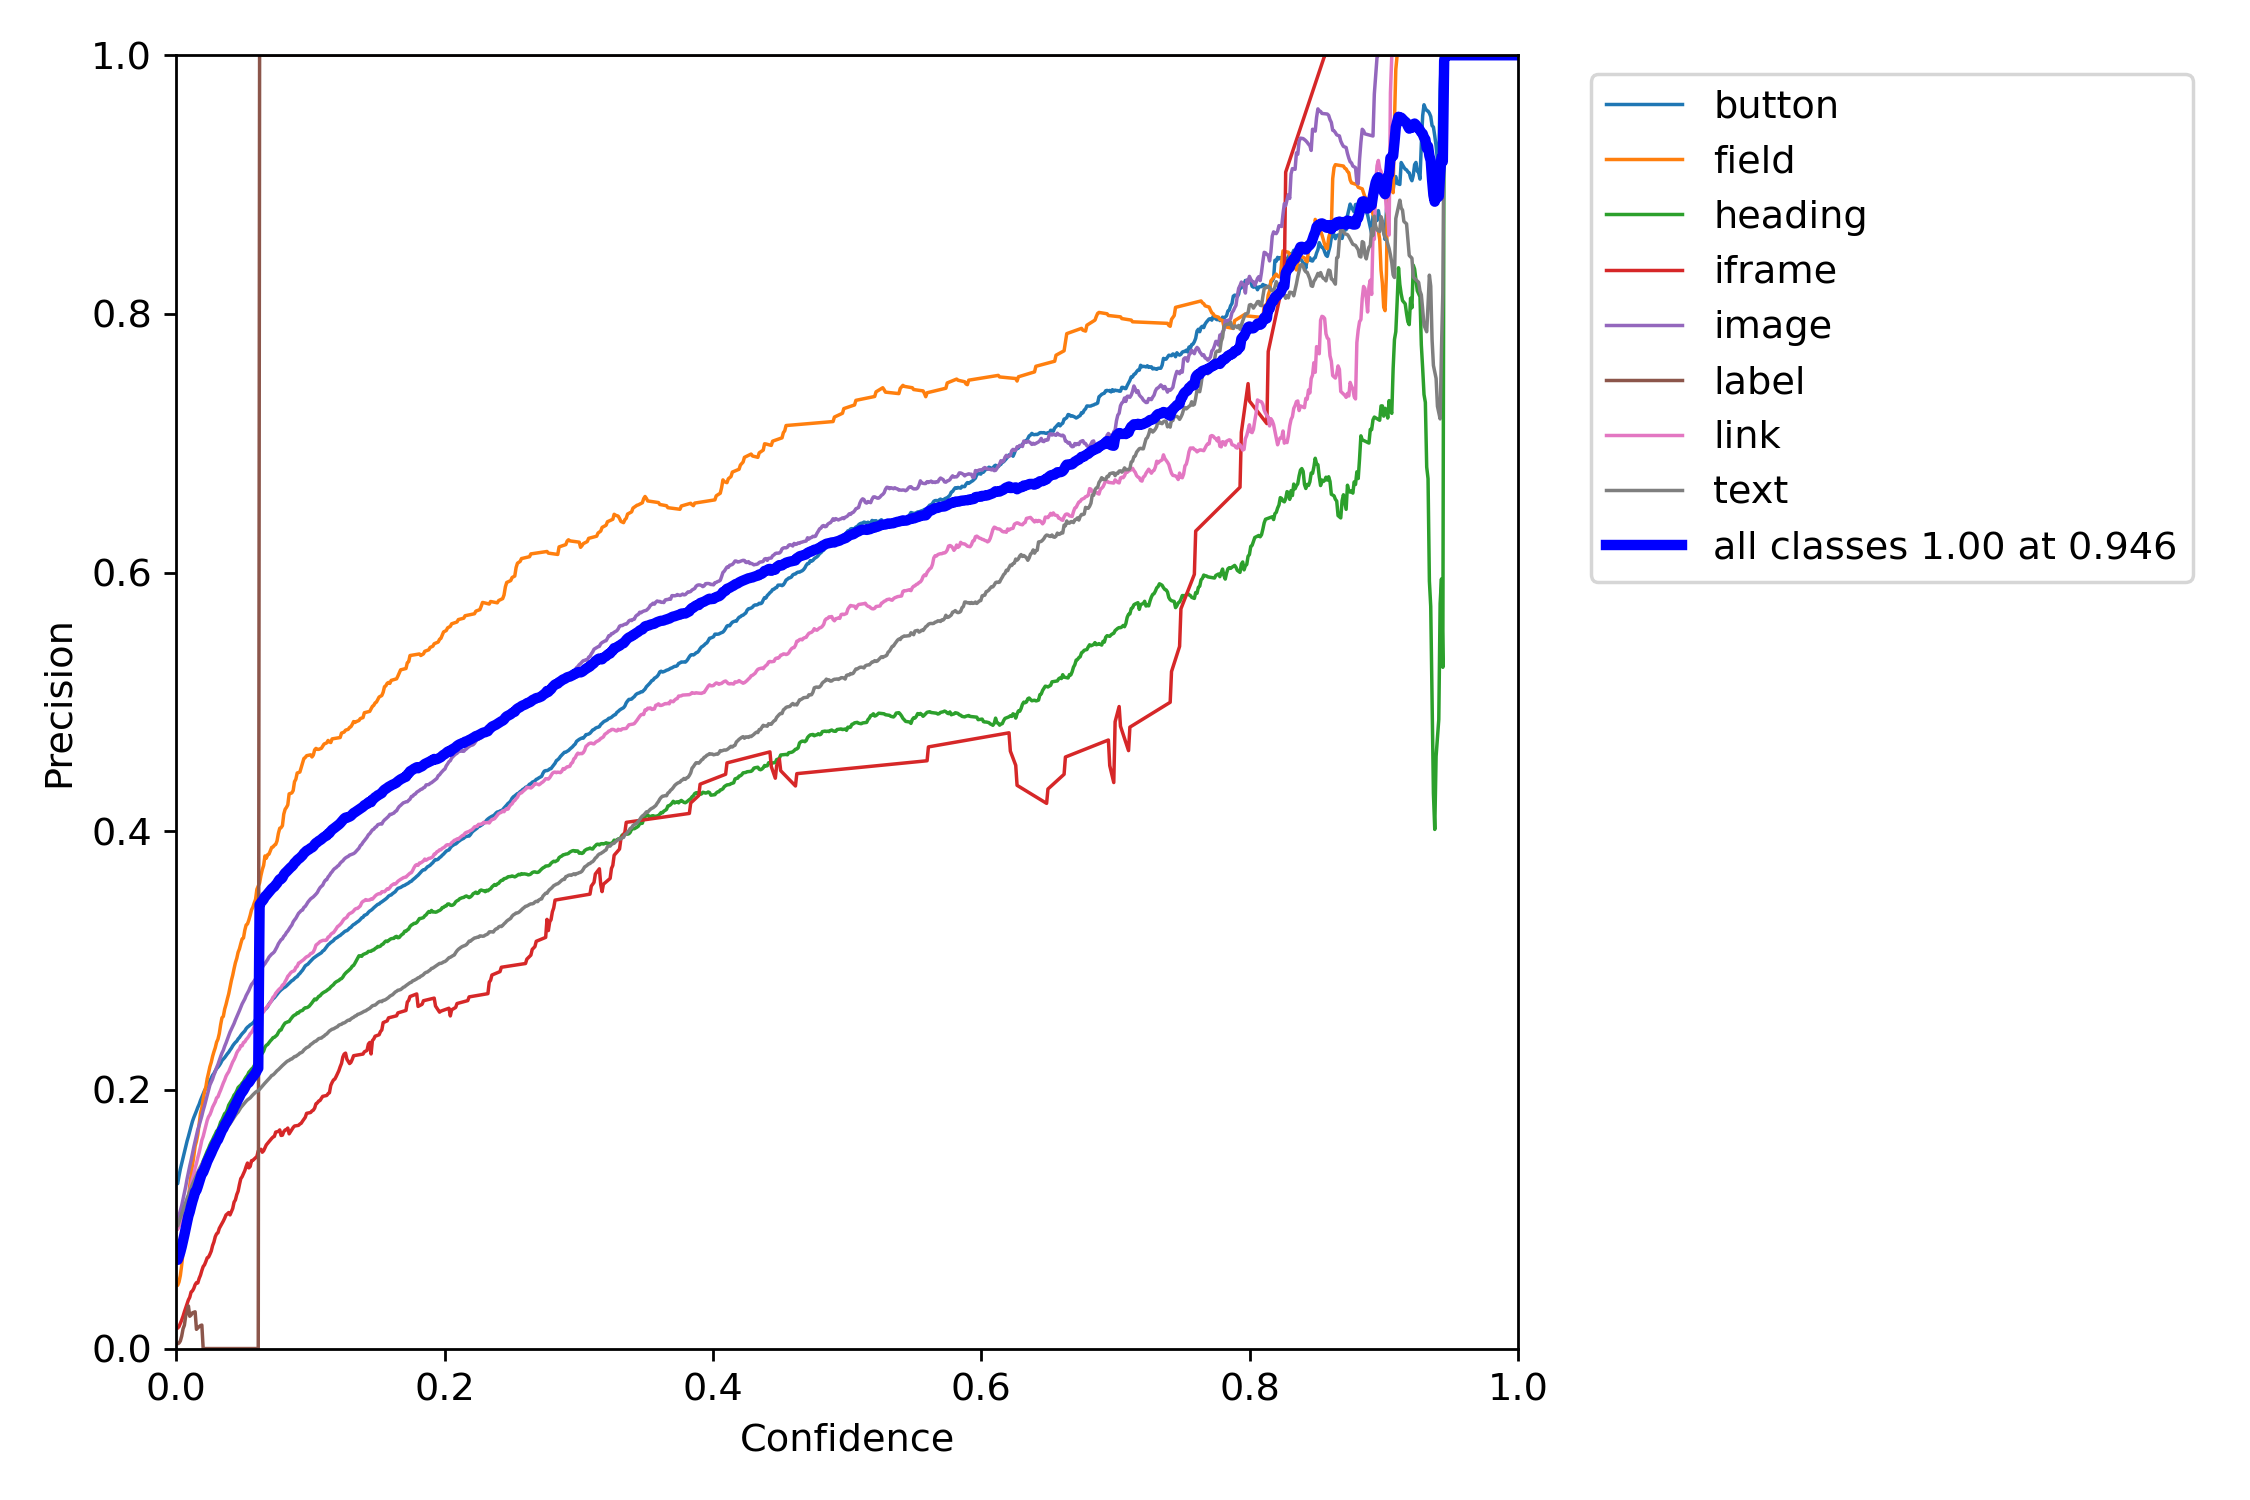

In [16]:
Image(filename='runs/train/exp/P_curve.png', width=800)

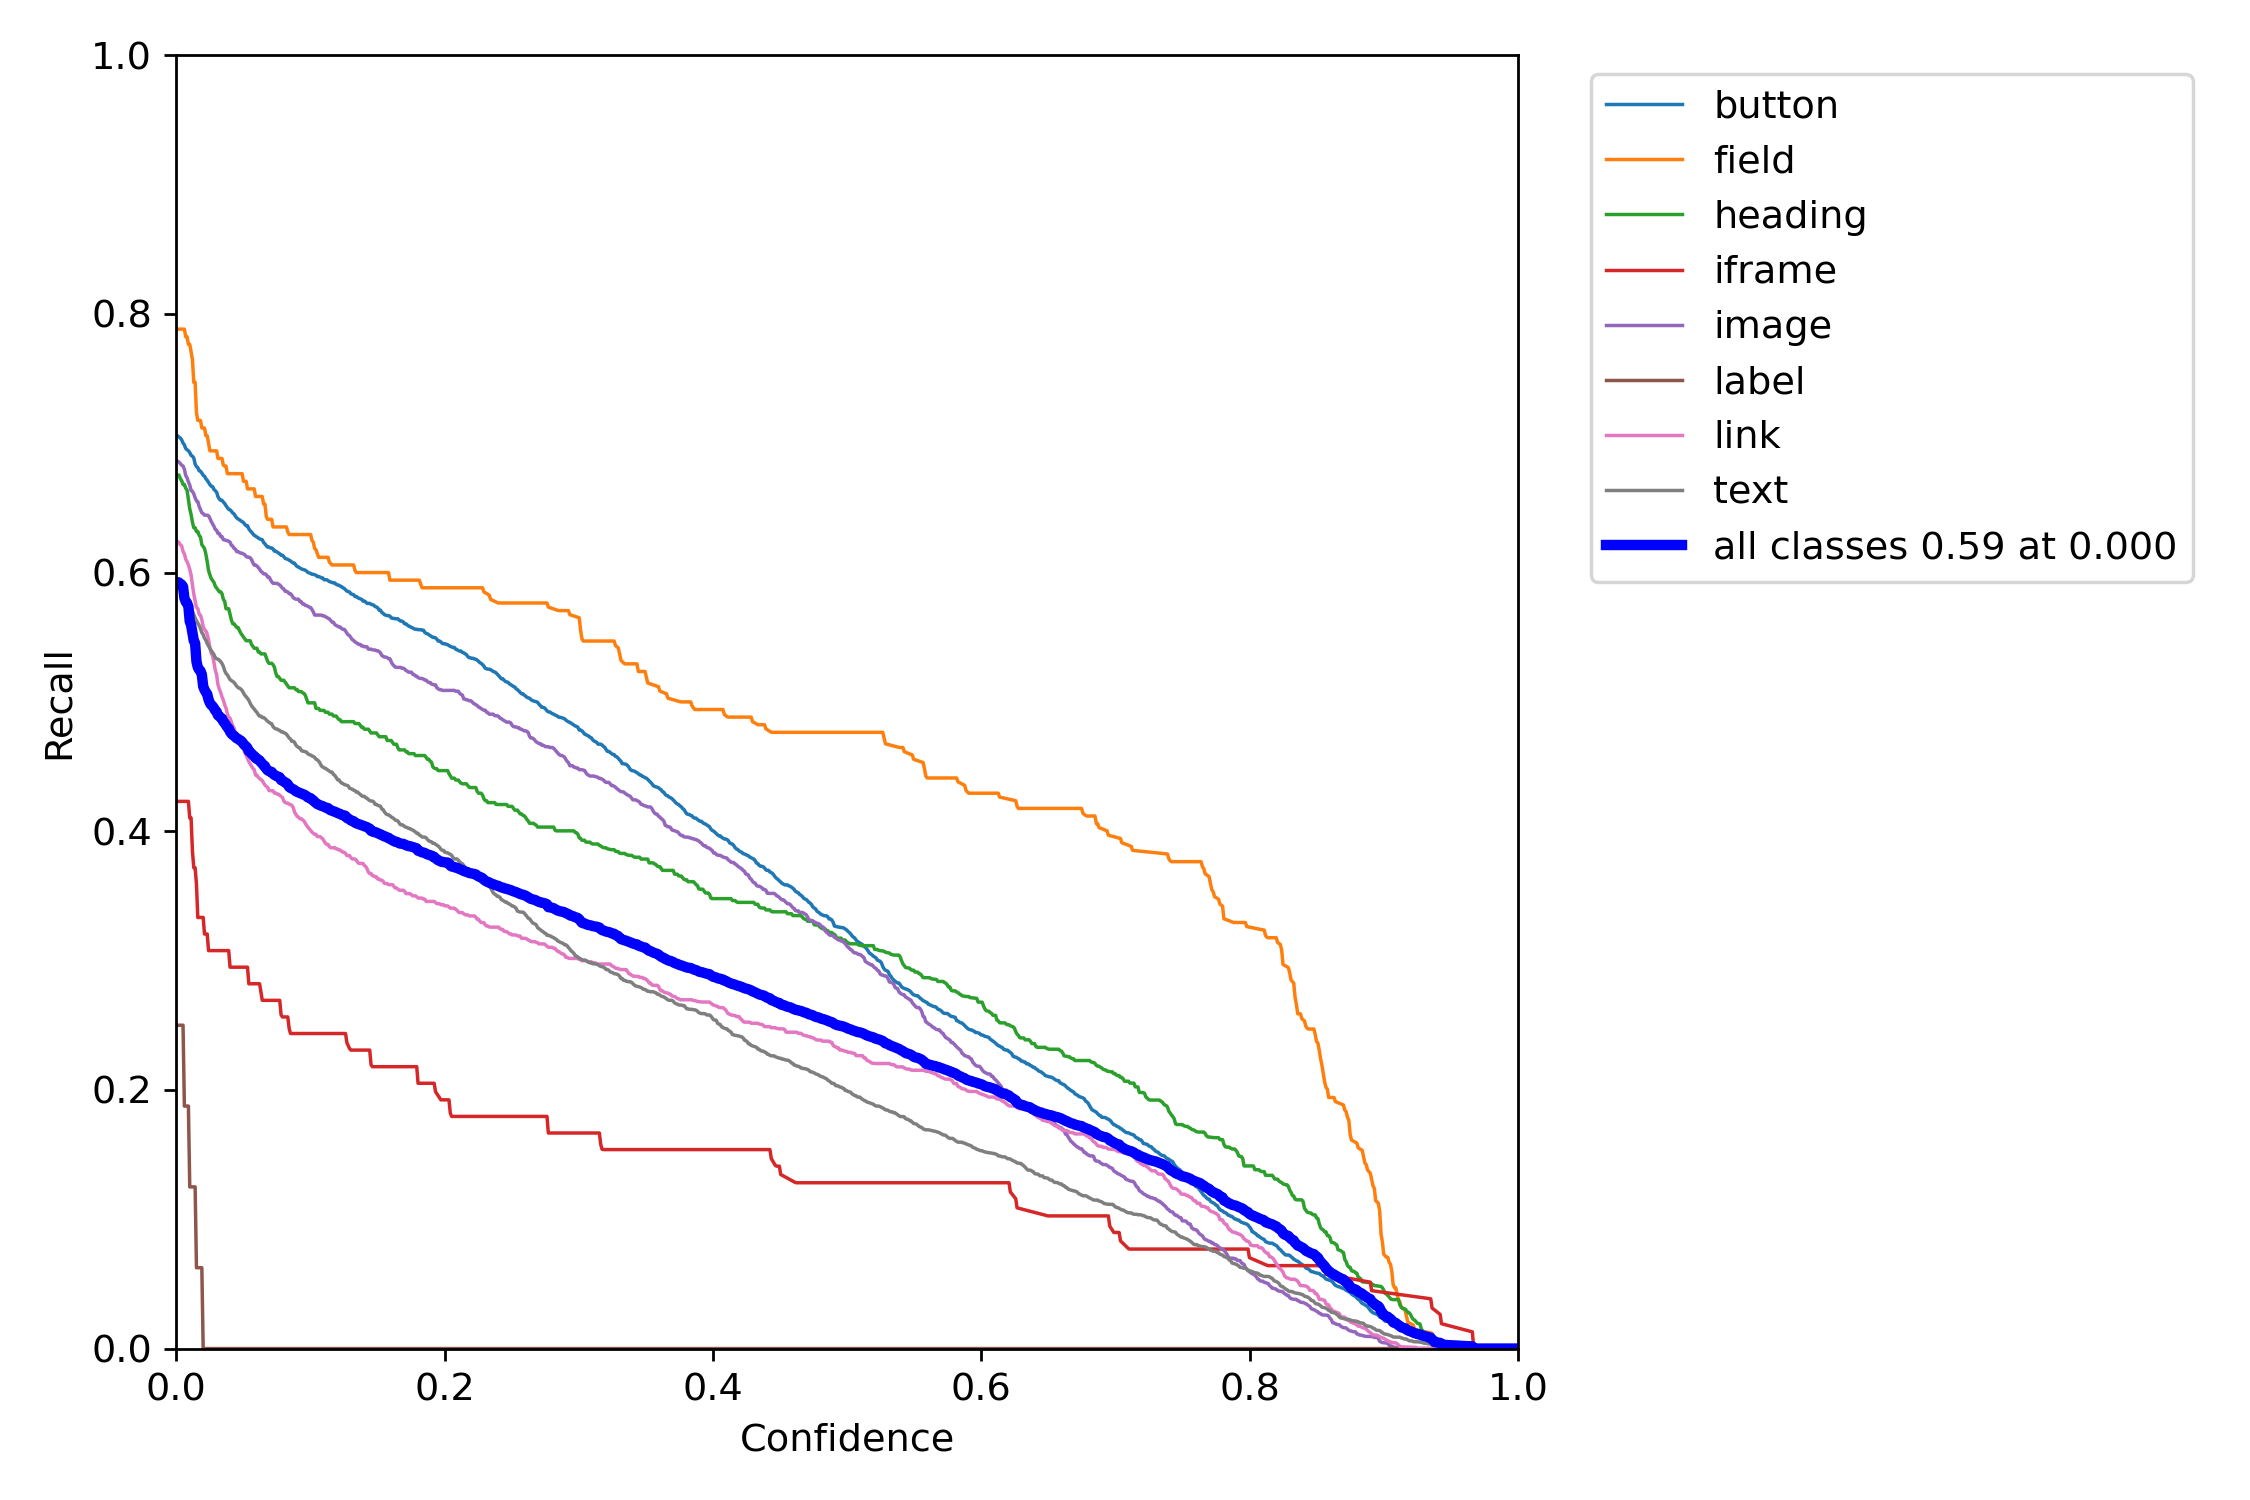

In [17]:
Image(filename='runs/train/exp/R_curve.png', width=800)

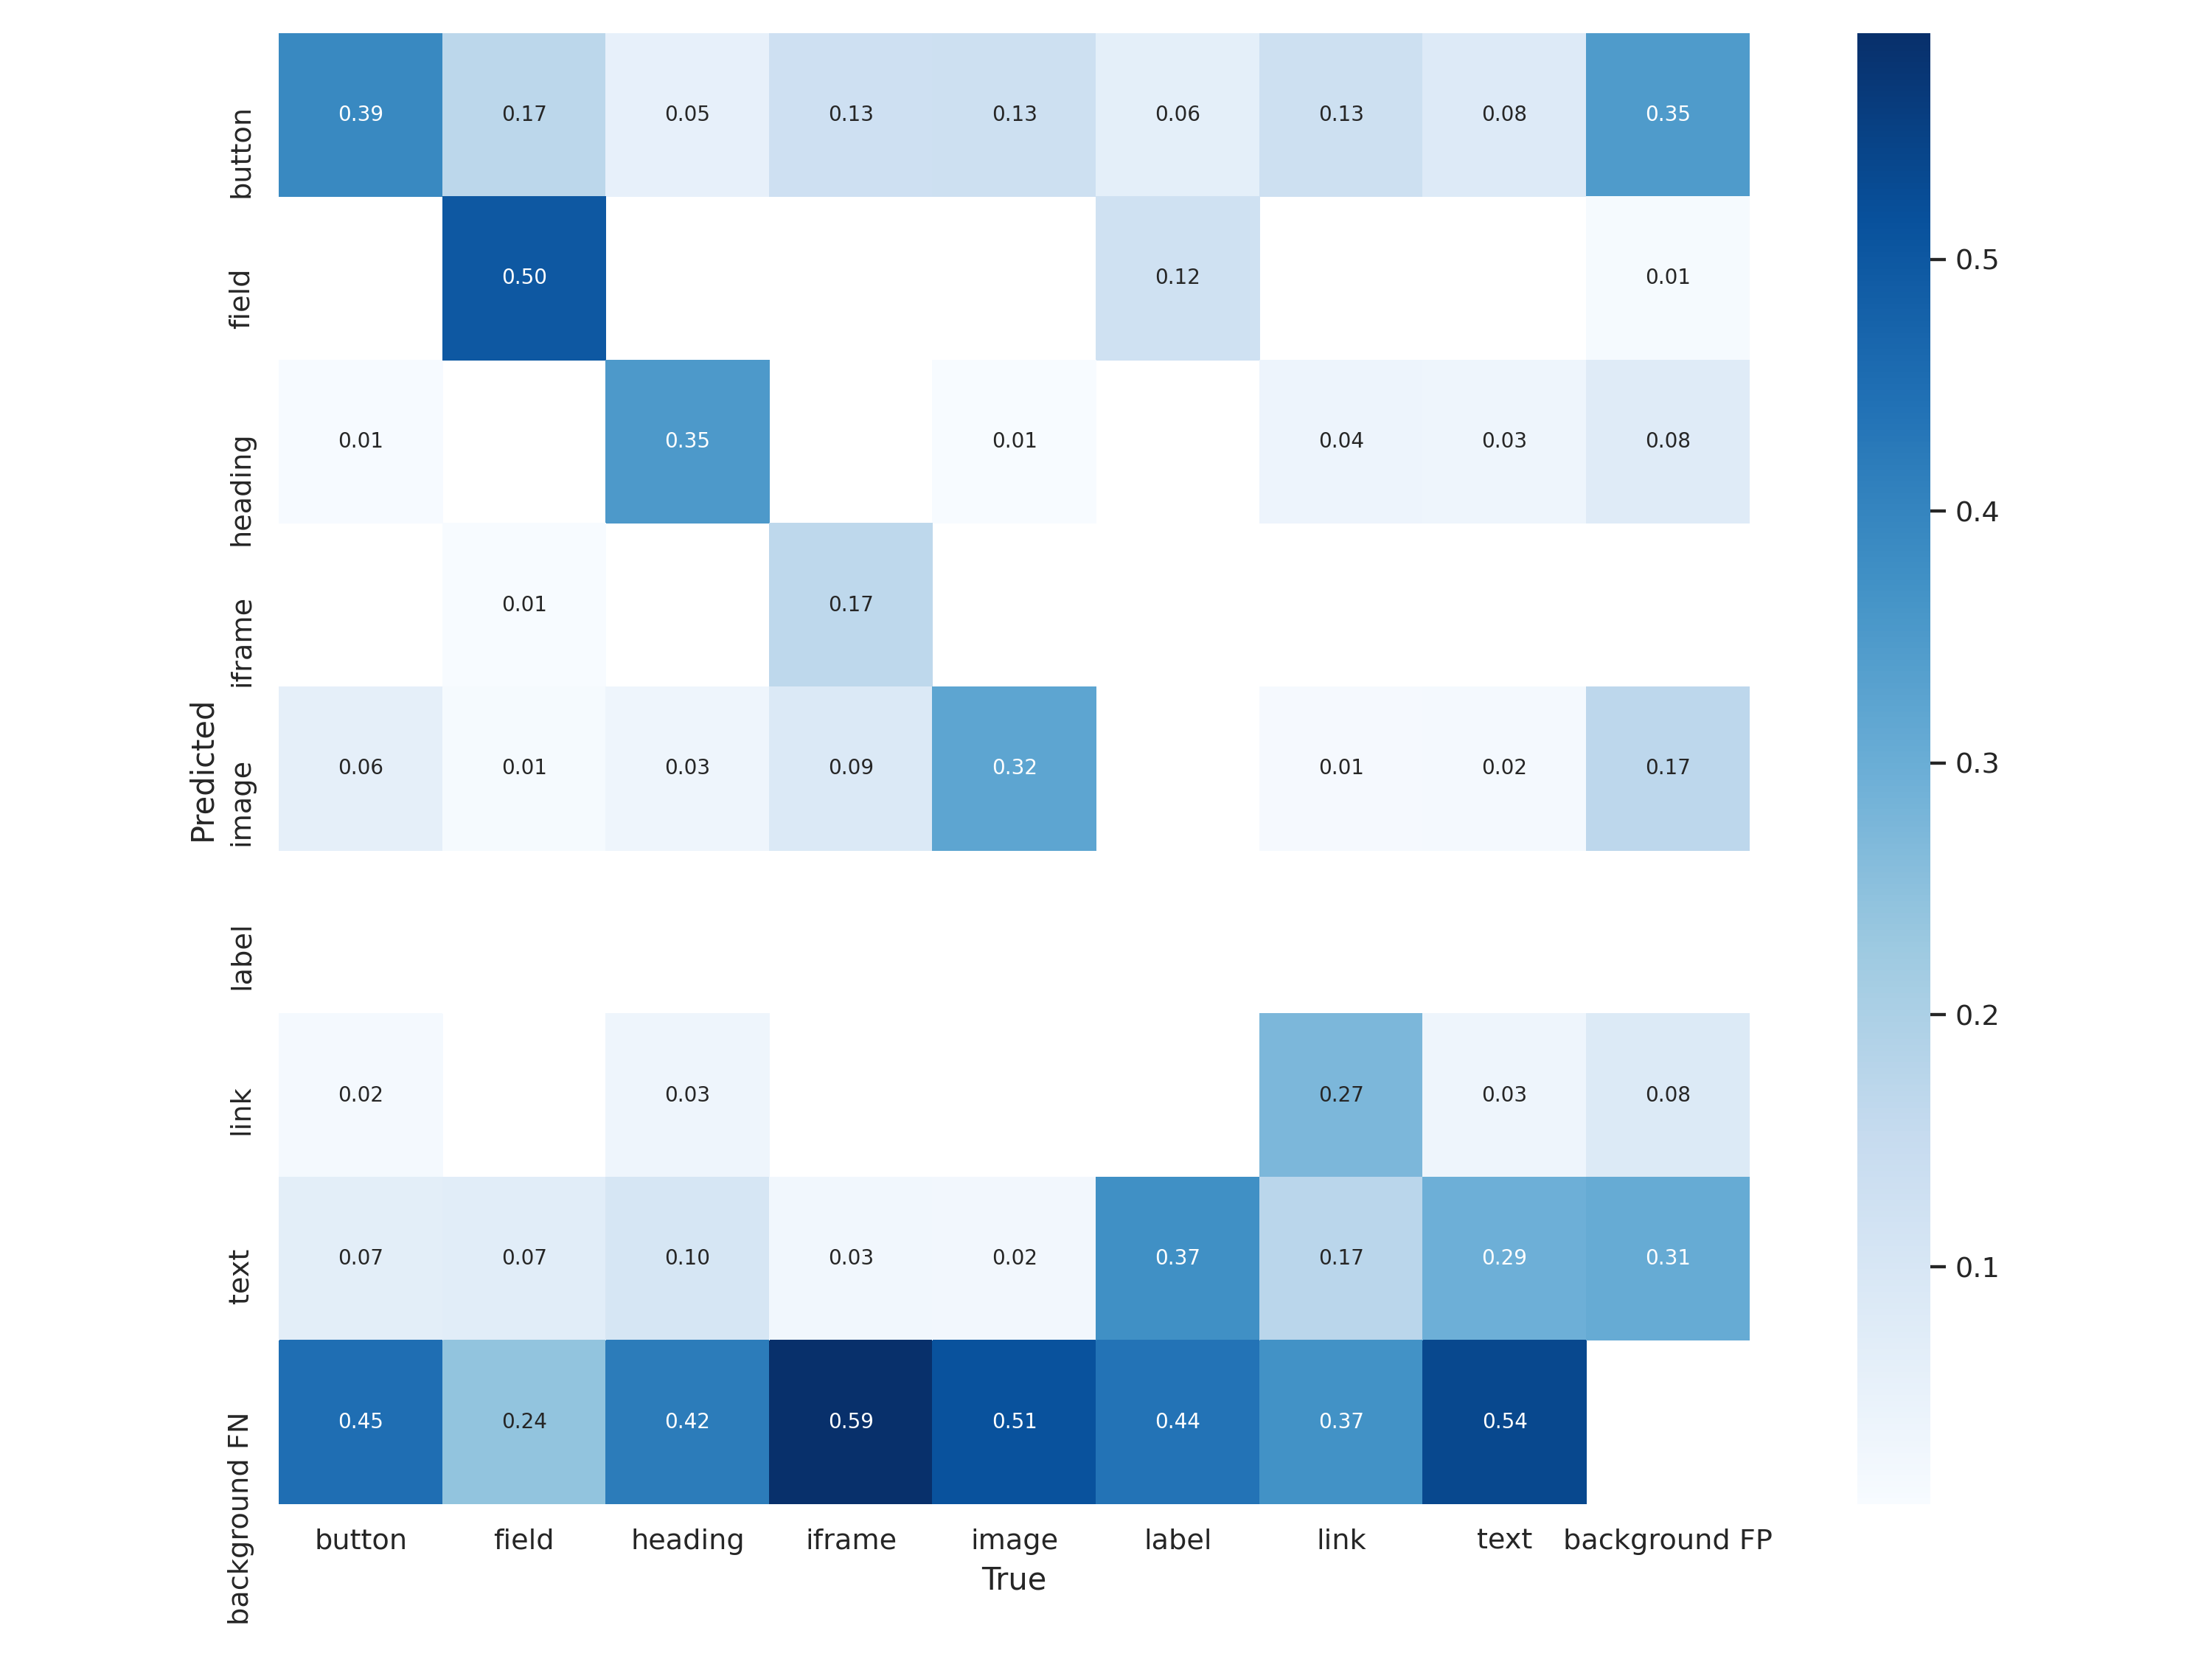

In [18]:
Image(filename='runs/train/exp/confusion_matrix.png', width=800)

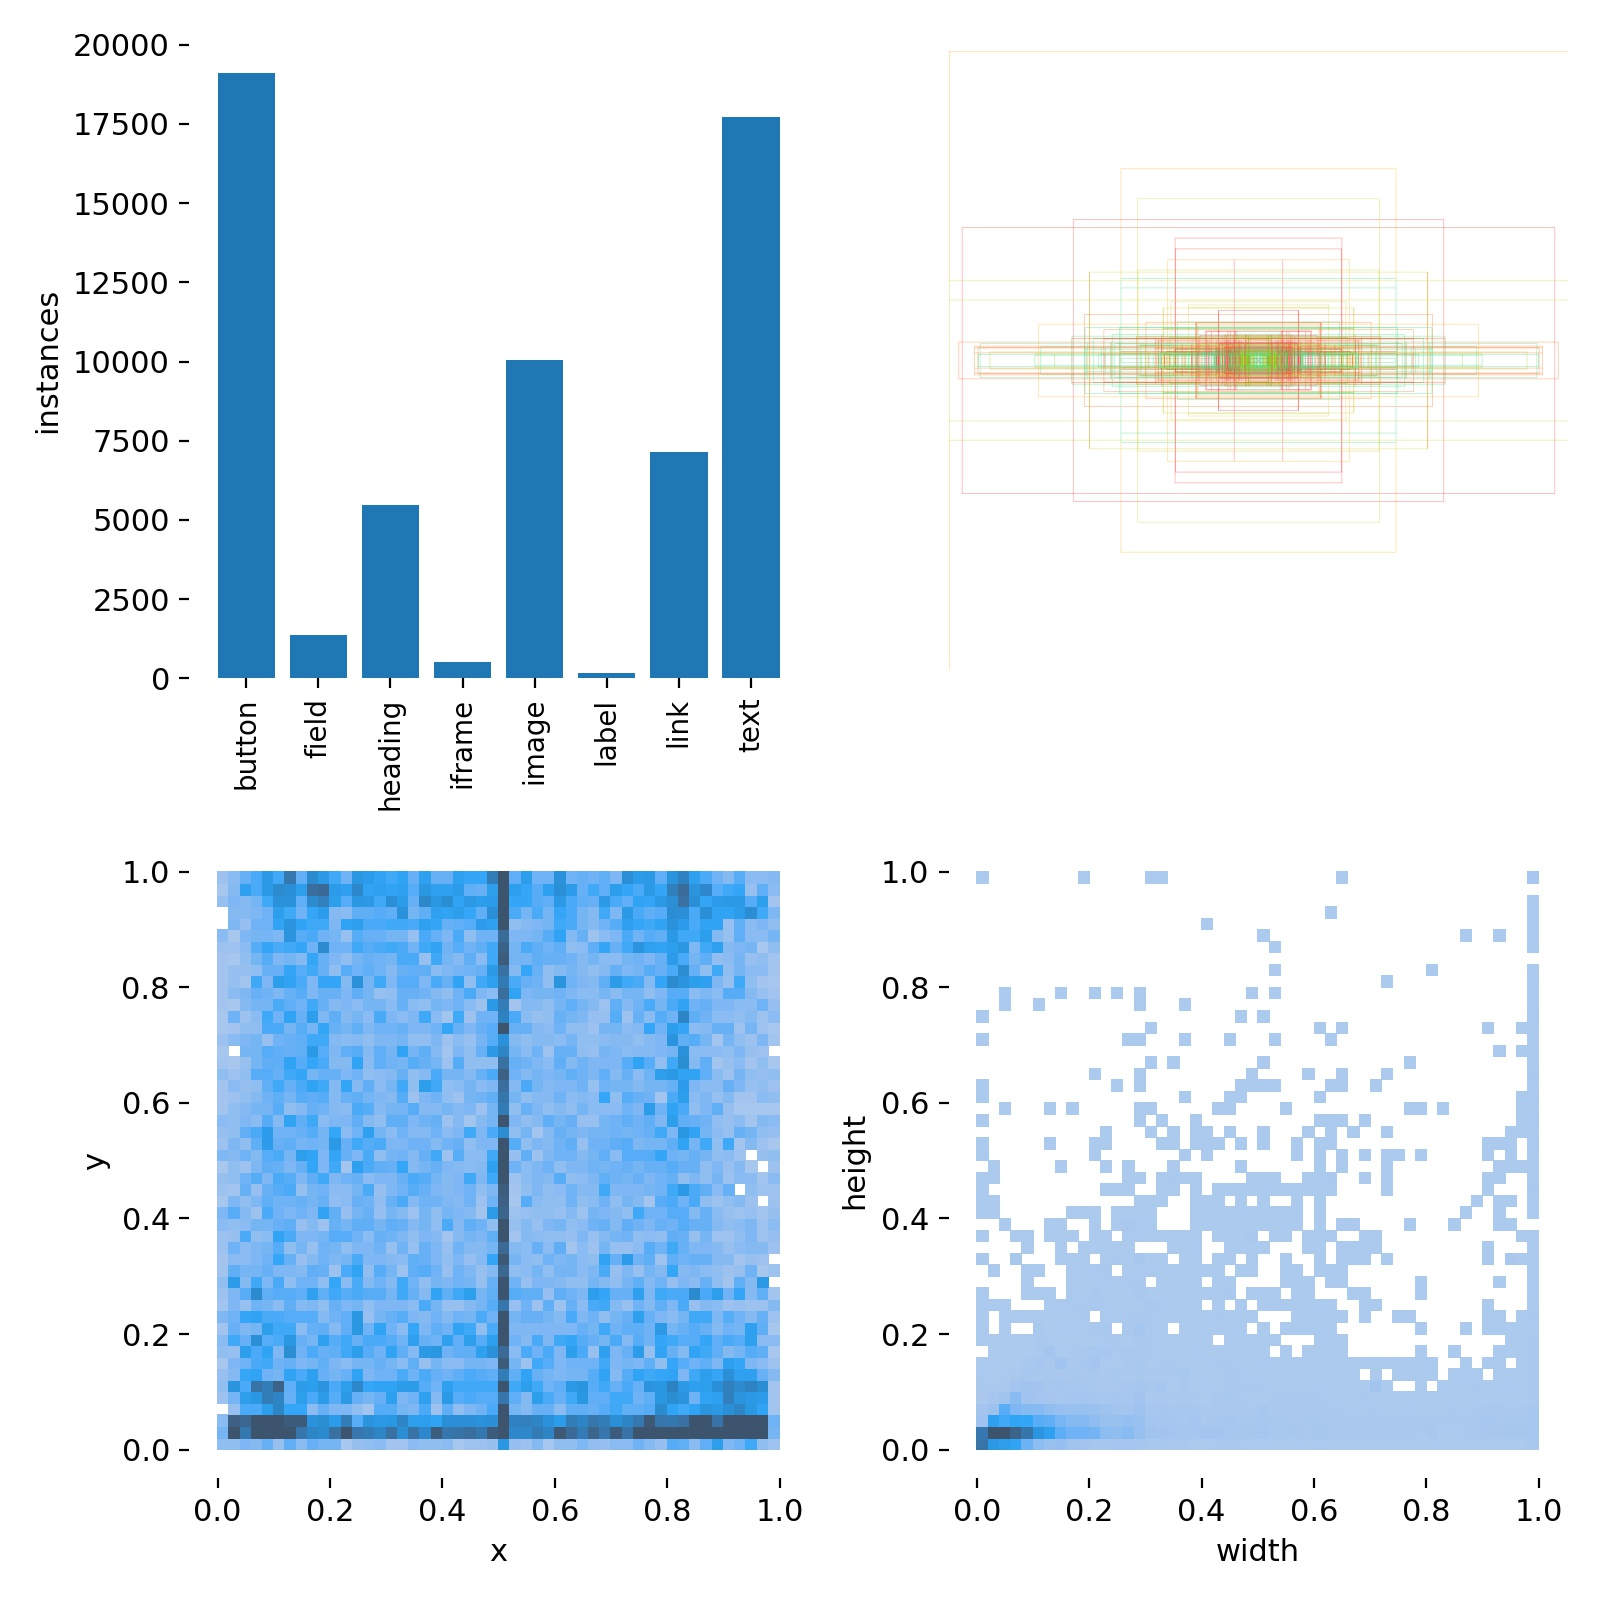

In [19]:
Image(filename='runs/train/exp/labels.jpg', width=800)

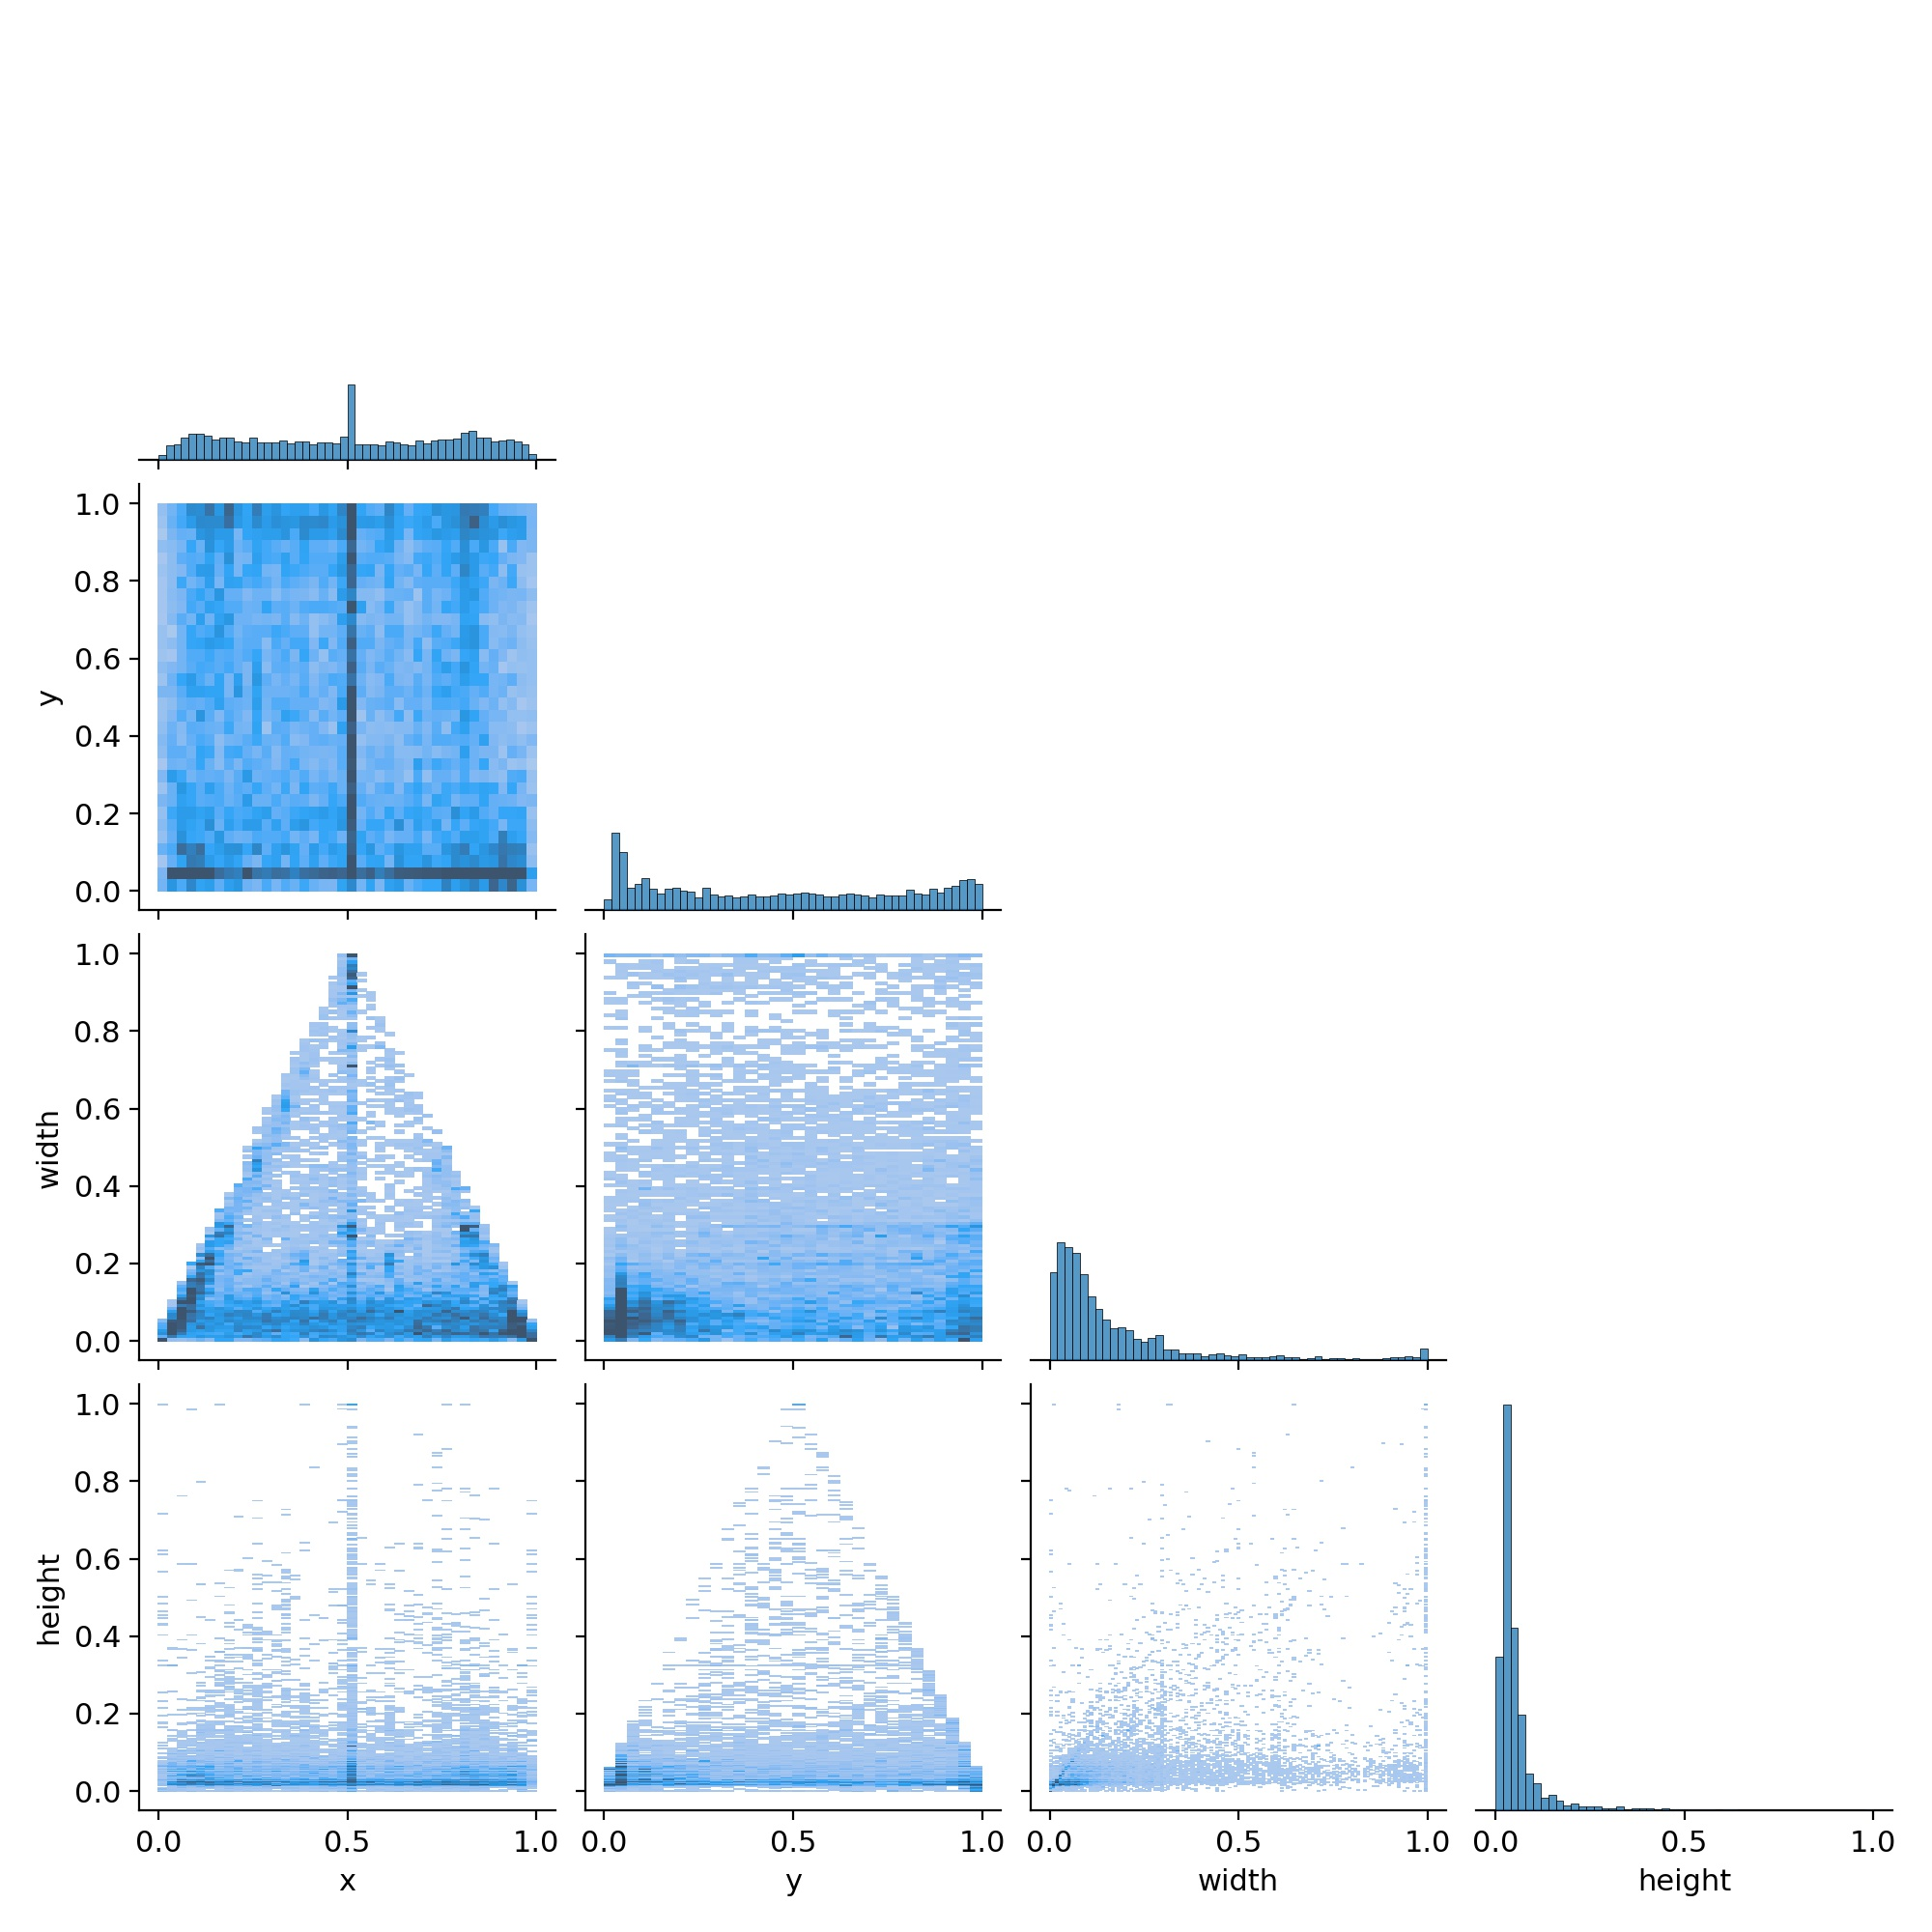

In [20]:
Image(filename='runs/train/exp/labels_correlogram.jpg', width=800)